In [1]:
import os

cwd=os.path.abspath('')
os.chdir('/mnt')
files=os.listdir(cwd)

In [2]:
!pip install mlxtend --user
!pip install lightgbm --user
!pip install xgboost --user
!pip install plotly --user

     |████████████████████████████████| 1.3 MB 38.4 MB/s            
     |████████████████████████████████| 31.2 MB 98.9 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 2.0 MB 34.1 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 193.6 MB 151 kB/s              
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 15.3 MB 35.6 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [1]:
import os
import pandas as pd
import scipy as sp
import numpy as np
import math
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

Matplotlib is building the font cache; this may take a moment.


In [2]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

def mae(y, y_pred):
    return np.mean(np.absolute(np.subtract(y, y_pred)))

In [3]:
df = pd.read_csv('/mnt/Datasets/Brazil_CO2_df.csv')

df['yield_per_ha'] = df['Dry_Finished_Yield_Mass_kg']/df['Crop_Area_ha']
df['CO2_value'] = df['value']
df = df.drop(columns = ['value', 'Dry_Finished_Yield_Mass_kg', 'Crop_Area_ha'])

print(display(df))

,Unnamed: 0,Harvest_Year,Field_Name,Latitude,Longitude,Total_Wet_Mass_Harvested_kg,Soil_Organic_Matter,Soil_Drainage,Soil_pH,Fertilizer_Type,...,K_as_Potassium_%,K_as_K2O_%,Crop_Protection_Application_Doses,Machine,Num_Passes,Total_Water_Applied_mm,result,unit,yield_per_ha,CO2_value
0,0,2020,M6I2035,"S 19° 23' 25,00""","W 47° 27' 01,70""",182960,2.50,good,5.5,Compose your own NPK,...,16.0,NaN,14,herbicide spraying,15,350,emissions_total,kgCO2e,3003.333333,-13221.26
1,1,2020,M6I2035,"S 19° 23' 25,00""","W 47° 27' 01,70""",182960,2.50,good,5.5,Compose your own NPK,...,16.0,NaN,14,herbicide spraying,15,350,emissions_per_area,kgCO2e/ha,3003.333333,-220.35
2,2,2020,M6I2035,"S 19° 23' 25,00""","W 47° 27' 01,70""",182960,2.50,good,5.5,Compose your own NPK,...,16.0,NaN,14,herbicide spraying,15,350,emissions_per_product,kgCO2e/kg,3003.333333,-0.07
3,3,2020,M6I2035,"S 19° 23' 25,00""","W 47° 27' 01,70""",182960,2.50,good,5.5,Compose your own NPK,...,16.0,NaN,14,herbicide spraying,15,350,soil_organic_carbon,%,3003.333333,1.45
4,4,2020,M6I2035,"S 19° 23' 25,00""","W 47° 27' 01,70""",182960,2.50,good,5.5,Compose your own NPK,...,16.0,NaN,14,herbicide spraying,15,350,machinery_fuel_usage,litre,3003.333333,1862.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31805,31805,2021,M6I21202,"S 16° 25' 19,30""","W 47° 37' 24,00""",831070,4.25,good,5.5,Urea - 46% N,...,NaN,NaN,18,pneumatic drill,3,350,emissions_total,kgCO2e,3417.615385,-67924.16
31806,31806,2021,M6I21202,"S 16° 25' 19,30""","W 47° 37' 24,00""",831070,4.25,good,5.5,Urea - 46% N,...,NaN,NaN,18,pneumatic drill,3,350,emissions_per_area,kgCO2e/ha,3417.615385,-522.49
31807,31807,2021,M6I21202,"S 16° 25' 19,30""","W 47° 37' 24,00""",831070,4.25,good,5.5,Urea - 46% N,...,NaN,NaN,18,pneumatic drill,3,350,emissions_per_product,kgCO2e/kg,3417.615385,-0.15
31808,31808,2021,M6I21202,"S 16° 25' 19,30""","W 47° 37' 24,00""",831070,4.25,good,5.5,Urea - 46% N,...,NaN,NaN,18,pneumatic drill,3,350,soil_organic_carbon,%,3417.615385,2.46


None


In [4]:
#####Subsetted data frame #1 Models
df_subset_1 = df.loc[(df['result'] == 'emissions_per_area') & (df['Soil_Drainage'] == 'good') & \
                  (df['Fertilizer_Type'] == 'Urea - 46% N') & (df['Application_Method'] == 'Incorporate') & \
                  (df['Machine'] == 'herbicide spraying')]

df_subset_1 = df_subset_1[['Soil_Organic_Matter', 'Soil_pH', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
                       'Num_Passes', 'Total_Water_Applied_mm', 'yield_per_ha', 'CO2_value']]

df_subset_1 = df_subset_1[~df_subset_1.isna()]

####Yield per Area
df_subset_1_yield_per_area = df_subset_1

####Train / Test Split
train_1_yield_per_ha, test_1_yield_per_ha = train_test_split(df_subset_1_yield_per_area, test_size = 0.2, random_state = 50)

X_1_train_yield_per_ha = train_1_yield_per_ha.drop(columns = ['yield_per_ha'])
X_1_test_yield_per_ha = test_1_yield_per_ha.drop(columns = ['yield_per_ha'])
y_1_train_yield_per_ha = train_1_yield_per_ha['yield_per_ha']
y_1_test_yield_per_ha = test_1_yield_per_ha['yield_per_ha']

In [56]:
yield_per_ha_mean_1 = y_1_train_yield_per_ha.mean()

####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building
model_names_1 = ['Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models_1 = [make_pipeline(MinMaxScaler(), LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds)), \
                  make_pipeline(MinMaxScaler(), RidgeCV(alphas = alphas_alt, cv = kfolds)), \
                  make_pipeline(MinMaxScaler(), ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio)), \
                  make_pipeline(RobustScaler(), SVR(C = 20, epsilon = 0.008, gamma = 0.0003)), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models_1 = []
Test_RMSE_models_1 = []
Test_Scaled_RMSE_models_1 = []

for model_1 in models_1:
    fitted_models_1.append(model_1.fit(X_1_train_yield_per_ha, y_1_train_yield_per_ha))
    Test_RMSE_models_1.append(rmse(y_1_test_yield_per_ha, fitted_models_1[models_1.index(model_1)].predict(X_1_test_yield_per_ha)))
    Test_Scaled_RMSE_models_1.append(Test_RMSE_models_1[models_1.index(model_1)]/yield_per_ha_mean)

#stacked model
model_names_1.append('stackgen')
models_1.append(StackingCVRegressor(regressors = (models_1[0], models_1[1], models_1[2], models_1[3], models_1[4], models_1[5], models_1[6]), meta_regressor = models_1[6], use_features_in_secondary = True))
fitted_models_1.append(models_1[7].fit(X_1_train_yield_per_ha, y_1_train_yield_per_ha))
Test_RMSE_models_1.append(rmse(y_1_test_yield_per_ha, fitted_models_1[7].predict(X_1_test_yield_per_ha)))
Test_Scaled_RMSE_models_1.append(Test_RMSE_models_1[7]/yield_per_ha_mean_1)                      

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[20:57:38] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

Lasso
RMSE on test data: 1094.2046006234862
RMSE Scaled on test data: 0.31925694312003644


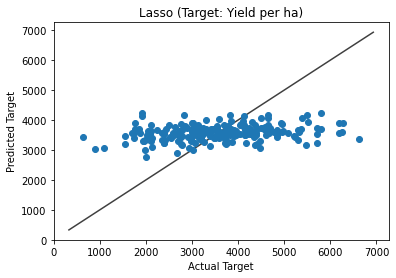

Ridge
RMSE on test data: 1114.8245382068144
RMSE Scaled on test data: 0.3161748996385497


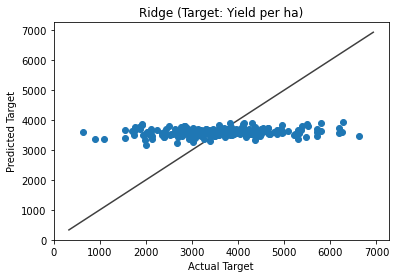

ElasticNet
RMSE on test data: 1094.6316359793695
RMSE Scaled on test data: 0.31916932834449624


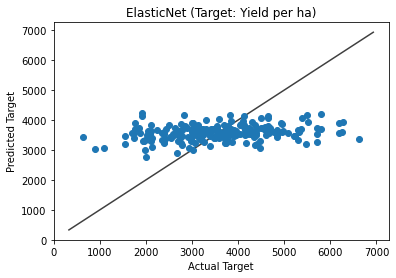

SVR
RMSE on test data: 1142.1470343742437
RMSE Scaled on test data: 0.32140740050085254


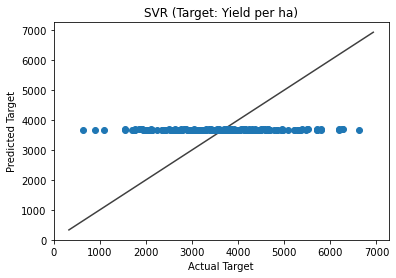

Lightgbm
RMSE on test data: 1071.6252116219218
RMSE Scaled on test data: 0.3119607721082428


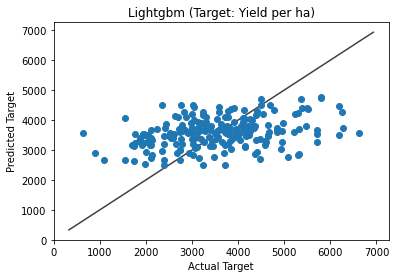

GBR
RMSE on test data: 1014.2601597341607
RMSE Scaled on test data: 0.29925366465308995


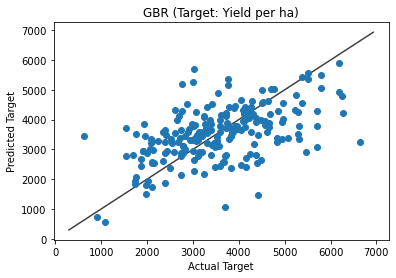

XGBoost
RMSE on test data: 976.7669898633818
RMSE Scaled on test data: 0.260518278568285


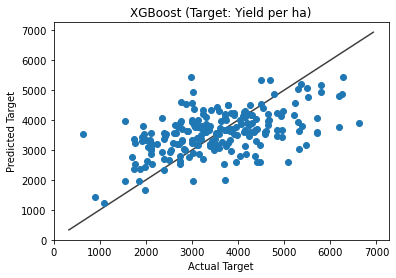

stackgen
RMSE on test data: 990.0731229702671
RMSE Scaled on test data: 0.2565672775587338


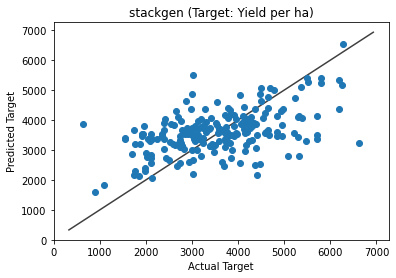

In [57]:
for model_name_1 in model_names_1:
    print(model_name_1)
    print('RMSE on test data: ' + str(Test_RMSE_models_1[model_names_1.index(model_name_1)]))
    print('RMSE Scaled on test data: ' + str(Test_Scaled_RMSE_models_2[model_names_1.index(model_name_1)]))
    fig, ax = plt.subplots()
    ax.scatter(y_1_test_yield_per_ha, fitted_models_1[model_names_1.index(model_name_1)].predict(X_1_test_yield_per_ha))
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name_1 + ' (Target: Yield per ha)')
    plt.show()

In [16]:
#####Subsetted data frame #2 Models
df_subset = df.loc[(df['result'] == 'emissions_per_area') & (df['Soil_Drainage'] == 'good') & \
                  (df['Fertilizer_Type'] == 'Compose your own NPK') & (df['Application_Method'] == 'Incorporate') & \
                  (df['Machine'] == 'herbicide spraying')]

df_subset_2 = df_subset[['Soil_Organic_Matter', 'Soil_pH', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
                       'Num_Passes', 'Total_Water_Applied_mm', 'yield_per_ha', 'CO2_value']]

df_subset_2 = df_subset_2[~df_subset_2.isna()]

####Yield per Area
df_2_yield_per_ha = df_subset_2
X_2_yield_per_ha = df_2_yield_per_ha.drop(columns = ['yield_per_ha'])
y_2_yield_per_ha = df_2_yield_per_ha['yield_per_ha']

####Train / Test Split
train_2_yield_per_ha, test_2_yield_per_ha = train_test_split(df_2_yield_per_ha, test_size = 0.2, random_state = 50)

X_2_train_yield_per_ha = train_2_yield_per_ha.drop(columns = ['yield_per_ha'])
X_2_test_yield_per_ha = test_2_yield_per_ha.drop(columns = ['yield_per_ha'])
y_2_train_yield_per_ha = train_2_yield_per_ha['yield_per_ha']
y_2_test_yield_per_ha = test_2_yield_per_ha['yield_per_ha']

####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

In [44]:
yield_per_ha_mean_2 = y_2_train_yield_per_ha.mean()

####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building
model_names_2 = ['Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models_2 = [make_pipeline(MinMaxScaler(), LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds)), \
                  make_pipeline(MinMaxScaler(), RidgeCV(alphas = alphas_alt, cv = kfolds)), \
                  make_pipeline(MinMaxScaler(), ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio)), \
                  make_pipeline(RobustScaler(), SVR(C = 20, epsilon = 0.008, gamma = 0.0003)), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models_2 = []
Test_RMSE_models_2 = []
Test_Scaled_RMSE_models_2 = []

for model_2 in models_2:
    fitted_models_2.append(model_2.fit(X_2_train_yield_per_ha, y_2_train_yield_per_ha))
    Test_RMSE_models_2.append(rmse(y_2_test_yield_per_ha, fitted_models_2[models_2.index(model_2)].predict(X_2_test_yield_per_ha)))
    Test_Scaled_RMSE_models_2.append(Test_RMSE_models_2[models_2.index(model_2)]/yield_per_ha_mean_2)

#stacked model
model_names_2.append('stackgen')
models_2.append(StackingCVRegressor(regressors = (models_2[0], models_2[1], models_2[2], models_2[3], models_2[4], models_2[5], models_2[6]), meta_regressor = models_2[6], use_features_in_secondary = True))
fitted_models_2.append(models_2[7].fit(X_2_train_yield_per_ha, y_2_train_yield_per_ha))
Test_RMSE_models_2.append(rmse(y_2_test_yield_per_ha, fitted_models_2[7].predict(X_2_test_yield_per_ha)))
Test_Scaled_RMSE_models_2.append(Test_RMSE_models_2[7]/yield_per_ha_mean_2)                      

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[20:42:49] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

lasso
RMSE on test data: 1146.6305480309004
RMSE Scaled on test data: 0.31925694312003644


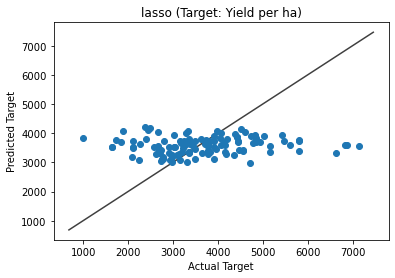

ridge
RMSE on test data: 1135.561203158725
RMSE Scaled on test data: 0.3161748996385497


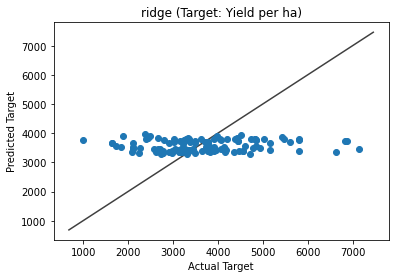

elasticnet
RMSE on test data: 1146.3158742853227
RMSE Scaled on test data: 0.31916932834449624


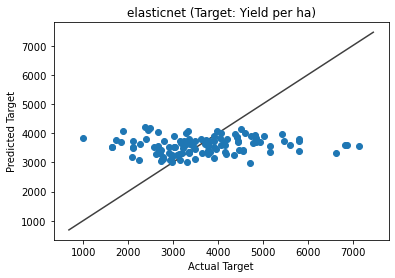

svr
RMSE on test data: 1154.3540452898312
RMSE Scaled on test data: 0.32140740050085254


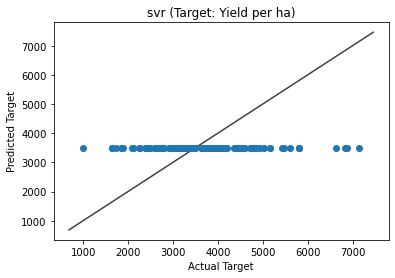

lightgbm
RMSE on test data: 1120.4259102115293
RMSE Scaled on test data: 0.3119607721082428


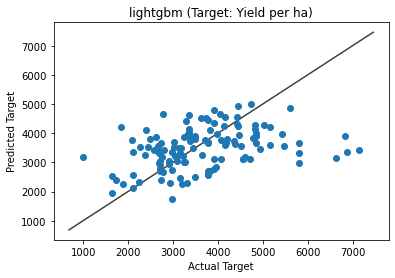

gbr
RMSE on test data: 1074.7875681200585
RMSE Scaled on test data: 0.29925366465308995


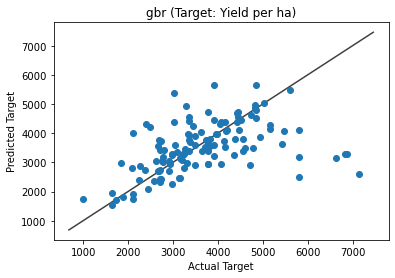

xgboost
RMSE on test data: 935.667094997227
RMSE Scaled on test data: 0.260518278568285


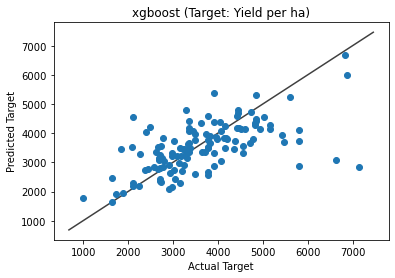

stackgen
RMSE on test data: 921.4768368040042
RMSE Scaled on test data: 0.2565672775587338


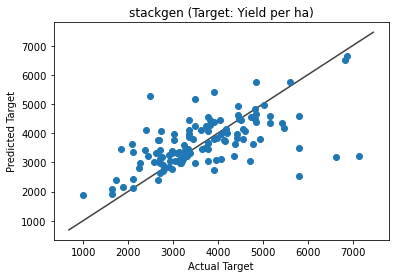

In [49]:
for model_name_2 in model_names_2:
    print(model_name_2)
    print('RMSE on test data: ' + str(Test_RMSE_models_2[model_names_2.index(model_name_2)]))
    print('RMSE Scaled on test data: ' + str(Test_Scaled_RMSE_models_2[model_names_2.index(model_name_2)]))
    fig, ax = plt.subplots()
    ax.scatter(y_2_test_yield_per_ha, fitted_models_2[model_names_2.index(model_name_2)].predict(X_2_test_yield_per_ha))
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name_2 + ' (Target: Yield per ha)')
    plt.show()

In [58]:
#####Subsetted data frame #3 Models
df_subset_3 = df.loc[(df['result'] == 'emissions_per_area') & (df['Soil_Drainage'] == 'good') & \
                     (df['Application_Method'] == 'Incorporate') & (df['Machine'] == 'herbicide spraying')]

df_subset_3 = df_subset_3[['Soil_Organic_Matter', 'Soil_pH', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
                       'Num_Passes', 'Total_Water_Applied_mm', 'yield_per_ha', 'CO2_value']]

df_subset_3 = df_subset_3[~df_subset_3.isna()]

####Yield per Area
df_subset_3_yield_per_area = df_subset_3

####Train / Test Split
train_3_yield_per_ha, test_3_yield_per_ha = train_test_split(df_subset_3_yield_per_area, test_size = 0.2, random_state = 50)

X_3_train_yield_per_ha = train_3_yield_per_ha.drop(columns = ['yield_per_ha'])
X_3_test_yield_per_ha = test_3_yield_per_ha.drop(columns = ['yield_per_ha'])
y_3_train_yield_per_ha = train_3_yield_per_ha['yield_per_ha']
y_3_test_yield_per_ha = test_3_yield_per_ha['yield_per_ha']

In [60]:
yield_per_ha_mean_3 = y_3_train_yield_per_ha.mean()

####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building
model_names_3 = ['Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models_3 = [make_pipeline(MinMaxScaler(), LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds)), \
                  make_pipeline(MinMaxScaler(), RidgeCV(alphas = alphas_alt, cv = kfolds)), \
                  make_pipeline(MinMaxScaler(), ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio)), \
                  make_pipeline(RobustScaler(), SVR(C = 20, epsilon = 0.008, gamma = 0.0003)), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models_3 = []
Test_RMSE_models_3 = []
Test_Scaled_RMSE_models_3 = []

for model_3 in models_3:
    fitted_models_3.append(model_3.fit(X_3_train_yield_per_ha, y_3_train_yield_per_ha))
    Test_RMSE_models_3.append(rmse(y_3_test_yield_per_ha, fitted_models_3[models_3.index(model_3)].predict(X_3_test_yield_per_ha)))
    Test_Scaled_RMSE_models_3.append(Test_RMSE_models_3[models_3.index(model_3)]/yield_per_ha_mean_3)

#stacked model
model_names_3.append('stackgen')
models_3.append(StackingCVRegressor(regressors = (models_3[0], models_3[1], models_3[2], models_3[3], models_3[4], models_3[5], models_3[6]), meta_regressor = models_3[6], use_features_in_secondary = True))
fitted_models_3.append(models_3[7].fit(X_3_train_yield_per_ha, y_3_train_yield_per_ha))
Test_RMSE_models_3.append(rmse(y_3_test_yield_per_ha, fitted_models_3[7].predict(X_3_test_yield_per_ha)))
Test_Scaled_RMSE_models_3.append(Test_RMSE_models_3[7]/yield_per_ha_mean_3)                      

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[21:05:48] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

Lasso
RMSE on test data: 1142.5601322667183
RMSE Scaled on test data: 0.31826161976566264


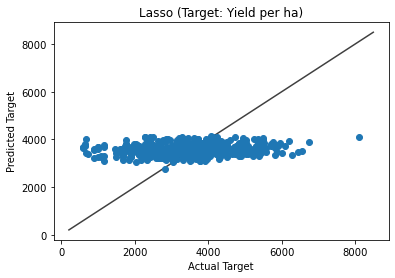

Ridge
RMSE on test data: 1147.745172170893
RMSE Scaled on test data: 0.31970591941506354


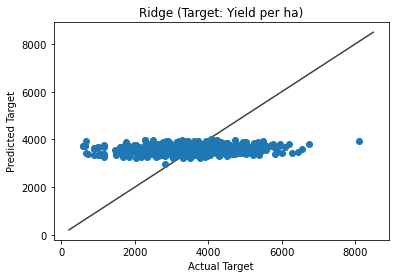

ElasticNet
RMSE on test data: 1142.7377262407886
RMSE Scaled on test data: 0.3183110887995034


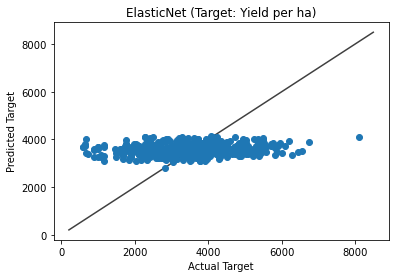

SVR
RMSE on test data: 1163.4996603268587
RMSE Scaled on test data: 0.32409435270403997


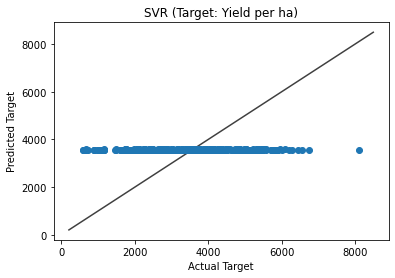

Lightgbm
RMSE on test data: 1070.093624603743
RMSE Scaled on test data: 0.29807597924114676


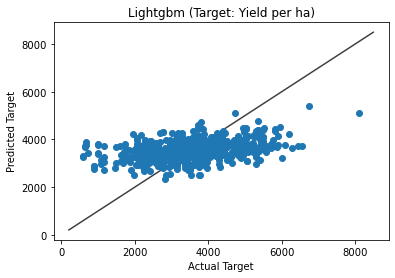

GBR
RMSE on test data: 647.6013635495344
RMSE Scaled on test data: 0.1803902071366982


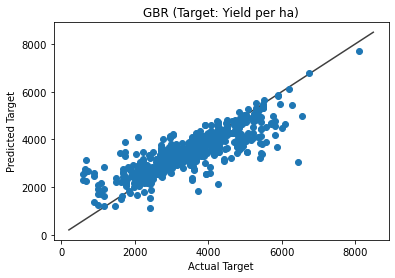

XGBoost
RMSE on test data: 796.4441877680584
RMSE Scaled on test data: 0.22185057056834034


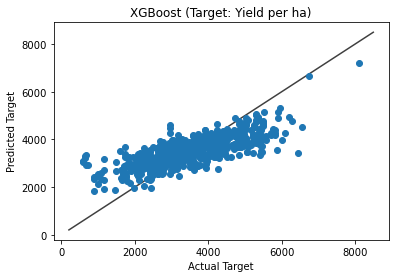

stackgen
RMSE on test data: 651.5086403388499
RMSE Scaled on test data: 0.18147858419863303


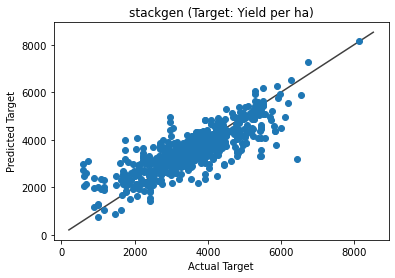

In [61]:
for model_name_3 in model_names_3:
    print(model_name_3)
    print('RMSE on test data: ' + str(Test_RMSE_models_3[model_names_3.index(model_name_3)]))
    print('RMSE Scaled on test data: ' + str(Test_Scaled_RMSE_models_3[model_names_3.index(model_name_3)]))
    fig, ax = plt.subplots()
    ax.scatter(y_3_test_yield_per_ha, fitted_models_3[model_names_3.index(model_name_3)].predict(X_3_test_yield_per_ha))
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name_3 + ' (Target: Yield per ha)')
    plt.show()

In [132]:
#####Full Dataset

#subset by Machine (identical datasets, only vary by Num_Passes (removed Num_Passes column due to low variance))
df_w_cat_features = df[df['Machine'] == 'herbicide spraying'].reset_index(drop = True)
df_w_cat_features = df_w_cat_features.drop(columns = ['Num_Passes', 'Machine', 'Unnamed: 0', 'Harvest_Year', 'Field_Name', 'Latitude', 'Longitude'])

# print(df_w_cat_features['Soil_Drainage'].value_counts())
# remove Soil_Drainage due to low variance

# print(df_w_cat_features['Soil_pH'].value_counts())

# print(df_w_cat_features['Fertilizer_Type'].value_counts())
# categorical

# print(df_w_cat_features['Application_Rate_Unit_kg/ha'].value_counts())

# print(df_w_cat_features['Application_Method'].value_counts())
# remove Application_Method due to low variance

df_w_cat_features[['N_as_Urea_%', 'N_as_Nitrate_%', 'N_as_Ammonium_%', 'P_as_Phosphorus_%', 'P_as_P2O5_%', 'K_as_Potassium_%', 'K_as_K2O_%']] = \
df_w_cat_features[['N_as_Urea_%', 'N_as_Nitrate_%', 'N_as_Ammonium_%', 'P_as_Phosphorus_%', 'P_as_P2O5_%', 'K_as_Potassium_%', 'K_as_K2O_%']].fillna(0)

# print(df_w_cat_features['N_as_Urea_%'].value_counts())
# print(df_w_cat_features['N_as_Nitrate_%'].value_counts())
# print(df_w_cat_features['N_as_Ammonium_%'].value_counts())
# print(df_w_cat_features['P_as_Phosphorus_%'].value_counts())
# print(df_w_cat_features['P_as_P2O5_%'].value_counts())
# print(df_w_cat_features['K_as_Potassium_%'].value_counts())
# print(df_w_cat_features['K_as_K2O_%'].value_counts())
# remove N_as_Ammonium_% and K_as_Potassium_% due to low variance

# print(df_w_cat_features['Crop_Protection_Application_Doses'].value_counts())

df_w_cat_features = df_w_cat_features[['Soil_Organic_Matter', 'Soil_pH', 'Fertilizer_Type', 'Application_Rate_Unit_kg/ha', 'N_as_Nitrate_%', 'N_as_Urea_%', 'P_as_Phosphorus_%',\
'P_as_P2O5_%', 'K_as_K2O_%', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm', 'yield_per_ha', 'CO2_value']]

df_w_cat_features_1_hot = pd.get_dummies(df_w_cat_features, columns = ['Fertilizer_Type'])

lbl = preprocessing.LabelEncoder()
df_w_cat_features['Fertilizer_Type'] = lbl.fit_transform(df_w_cat_features['Fertilizer_Type'].astype(str))
# df_w_cat_features['Fertilizer_Type'] = df_w_cat_features['Fertilizer_Type'].astype('category')

####Train / Test Split categorical feature
train_cat_feat_yield_per_ha, test_cat_feat_yield_per_ha = train_test_split(df_w_cat_features, test_size = 0.2, random_state = 50)

X_cat_feat_train_yield_per_ha = train_cat_feat_yield_per_ha.drop(columns = ['yield_per_ha'])
X_cat_feat_test_yield_per_ha = test_cat_feat_yield_per_ha.drop(columns = ['yield_per_ha'])
y_cat_feat_train_yield_per_ha = train_cat_feat_yield_per_ha['yield_per_ha']
y_cat_feat_test_yield_per_ha = test_cat_feat_yield_per_ha['yield_per_ha']

####Train / Test Split 1-hot_cat feature
train_cat_feat_hot_yield_per_ha, test_cat_hot_feat_yield_per_ha = train_test_split(df_w_cat_features_1_hot, test_size = 0.2, random_state = 50)

X_cat_feat_train_hot_yield_per_ha = train_cat_feat_hot_yield_per_ha.drop(columns = ['yield_per_ha'])
X_cat_feat_test_hot_yield_per_ha = test_cat_hot_feat_yield_per_ha.drop(columns = ['yield_per_ha'])
y_cat_feat_train_hot_yield_per_ha = train_cat_feat_hot_yield_per_ha['yield_per_ha']
y_cat_feat_test_hot_yield_per_ha = test_cat_hot_feat_yield_per_ha['yield_per_ha']

In [162]:
yield_per_ha_mean_cat_feat = train_cat_feat_yield_per_ha['yield_per_ha'].mean()

####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building
model_names_cat_feat = ['Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models_cat_feat = [make_pipeline(MinMaxScaler(), LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds)), \
                  make_pipeline(MinMaxScaler(), RidgeCV(alphas = alphas_alt, cv = kfolds)), \
                  make_pipeline(MinMaxScaler(), ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio)), \
                  make_pipeline(RobustScaler(), SVR(C = 20, epsilon = 0.008, gamma = 0.0003)), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                   XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                                colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
                   
                   
           ]

fitted_models_cat_feat = []
Test_RMSE_models_cat_feat = []
Test_Scaled_RMSE_models_cat_feat = []

for model_cat_feat in models_cat_feat:
    print(models_cat_feat.index(model_cat_feat))
    fitted_models_cat_feat.append(model_cat_feat.fit(X_cat_feat_train_hot_yield_per_ha, y_cat_feat_train_hot_yield_per_ha))
    Test_RMSE_models_cat_feat.append(rmse(y_cat_feat_test_hot_yield_per_ha, fitted_models_cat_feat[models_cat_feat.index(model_cat_feat)].predict(X_cat_feat_test_hot_yield_per_ha)))
    Test_Scaled_RMSE_models_cat_feat.append(Test_RMSE_models_cat_feat[models_cat_feat.index(model_cat_feat)]/yield_per_ha_mean_cat_feat)

print('6')
model_names_cat_feat.append('Lightgbm')
models_cat_feat.append(LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, \
                                     bagging_fraction = 0.75, bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1))
fitted_models_cat_feat.append(models_cat_feat[6].fit(X_cat_feat_train_yield_per_ha, y_cat_feat_train_yield_per_ha))
Test_RMSE_models_cat_feat.append(rmse(y_cat_feat_test_yield_per_ha, fitted_models_cat_feat[6].predict(X_cat_feat_test_yield_per_ha)))
Test_Scaled_RMSE_models_cat_feat.append(Test_RMSE_models_cat_feat[6]/yield_per_ha_mean_cat_feat)

0
1
2
3
4
5
[23:45:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
6
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75


In [139]:
print(Test_RMSE_models_cat_feat[5])
print(Test_Scaled_RMSE_models_cat_feat[4])

823.11705446566
Soil_Organic_Matter                  257.734400
Soil_pH                              129.478934
Fertilizer_Type                      126.202104
Application_Rate_Unit_kg/ha            3.879490
N_as_Nitrate_%                       192.542207
N_as_Urea_%                           45.388687
P_as_Phosphorus_%                    199.025032
P_as_P2O5_%                           70.891536
K_as_K2O_%                            58.206924
Crop_Protection_Application_Doses     39.865729
Total_Water_Applied_mm                 1.808433
yield_per_ha                           0.199636
CO2_value                              0.074272
dtype: float64


Lasso
RMSE on test data: 1158.5900695025932
RMSE Scaled on test data: 0.3236120036521061


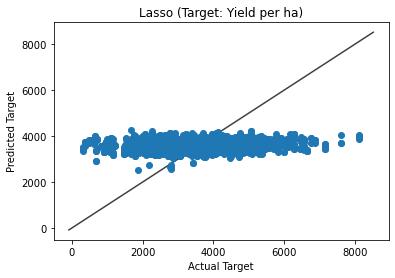

Ridge
RMSE on test data: 1158.0345525059292
RMSE Scaled on test data: 0.3234568392215751


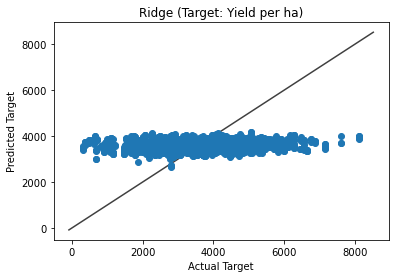

ElasticNet
RMSE on test data: 1158.401396586896
RMSE Scaled on test data: 0.32355930440852476


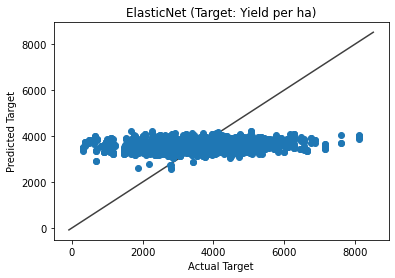

SVR
RMSE on test data: 1172.3330285477496
RMSE Scaled on test data: 0.3274506232206488


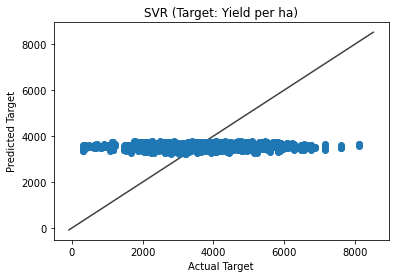

GBR
RMSE on test data: 714.7319865194606
RMSE Scaled on test data: 0.1996356229180463


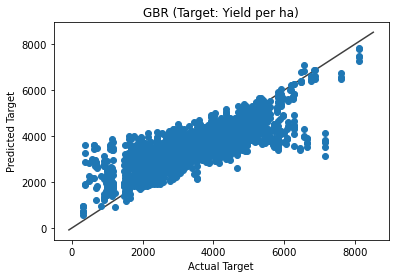

XGBoost
RMSE on test data: 823.11705446566
RMSE Scaled on test data: 0.22990923731135585


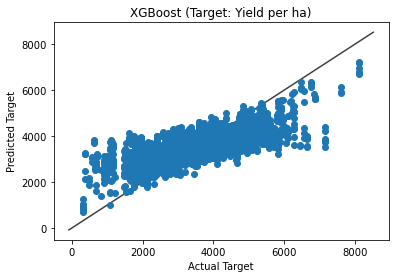

Lightgbm
RMSE on test data: 1034.0459364097023
RMSE Scaled on test data: 0.2888249141420015


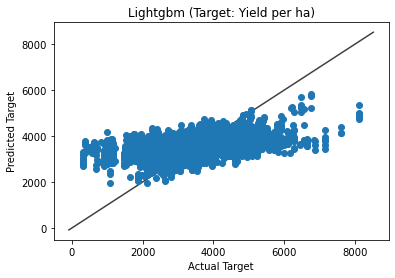

In [163]:
for model_name_cat_feat in model_names_cat_feat:
    
    print(model_name_cat_feat)
    print('RMSE on test data: ' + str(Test_RMSE_models_cat_feat[model_names_cat_feat.index(model_name_cat_feat)]))
    print('RMSE Scaled on test data: ' + str(Test_Scaled_RMSE_models_cat_feat[model_names_cat_feat.index(model_name_cat_feat)]))
    
    fig, ax = plt.subplots()
    
    if (model_names_cat_feat.index(model_name_cat_feat) < 6):
        ax.scatter(y_cat_feat_test_hot_yield_per_ha, fitted_models_cat_feat[model_names_cat_feat.index(model_name_cat_feat)].predict(X_cat_feat_test_hot_yield_per_ha))
        
    else:
        ax.scatter(y_cat_feat_test_yield_per_ha, fitted_models_cat_feat[model_names_cat_feat.index(model_name_cat_feat)].predict(X_cat_feat_test_yield_per_ha))        
    
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name_cat_feat + ' (Target: Yield per ha)')
    plt.show()

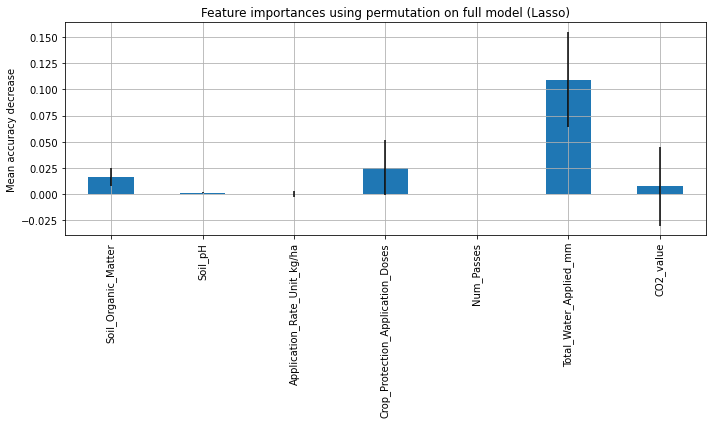

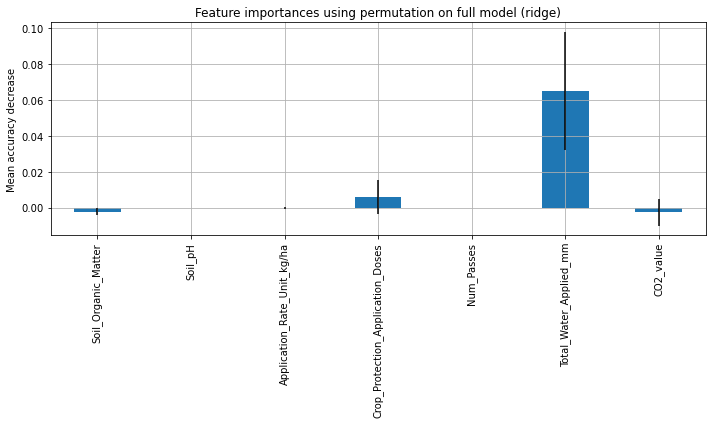

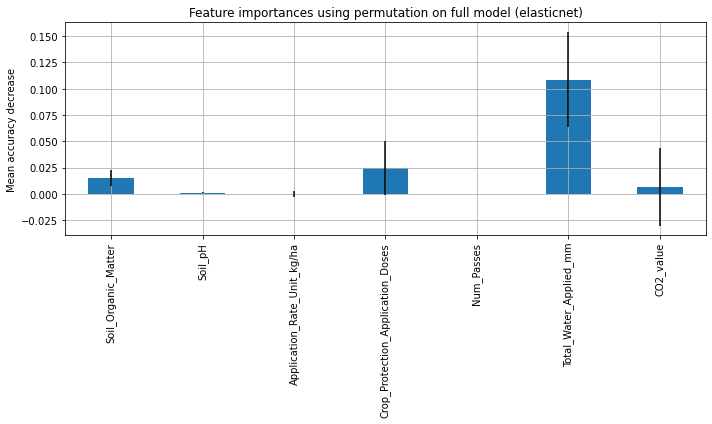

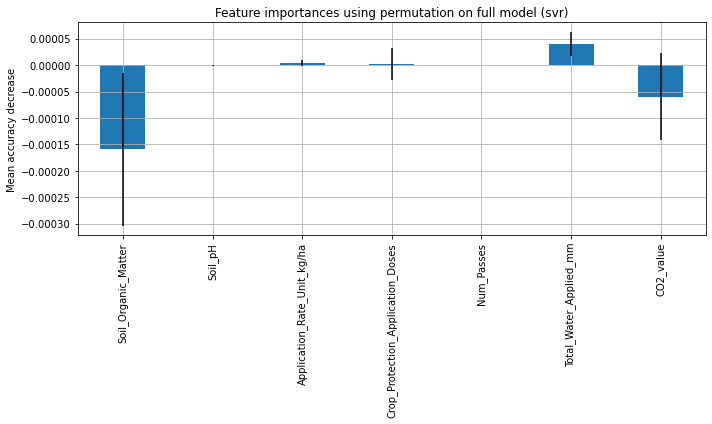

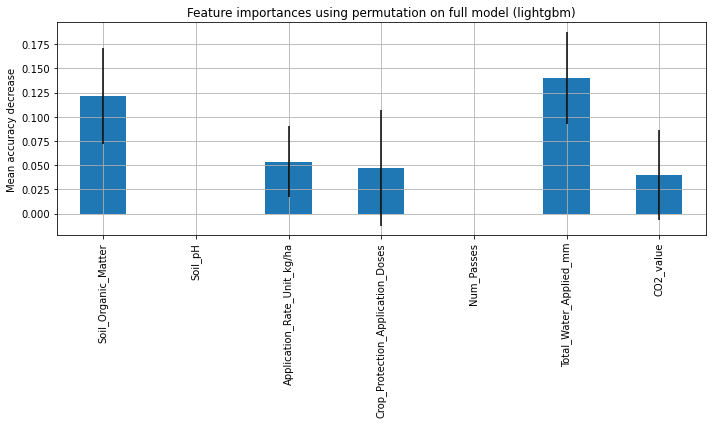

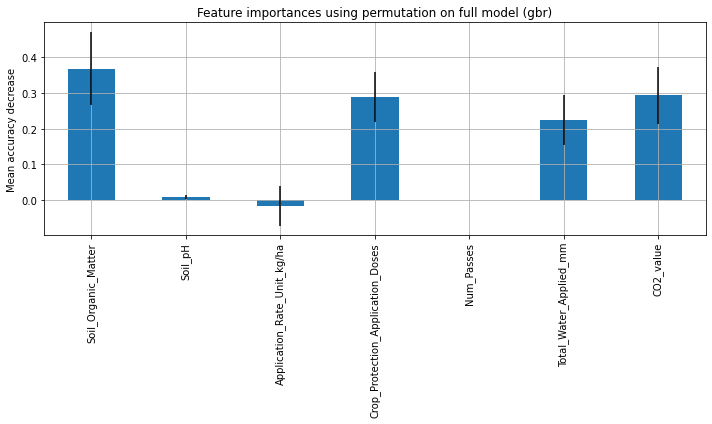

[20:07:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


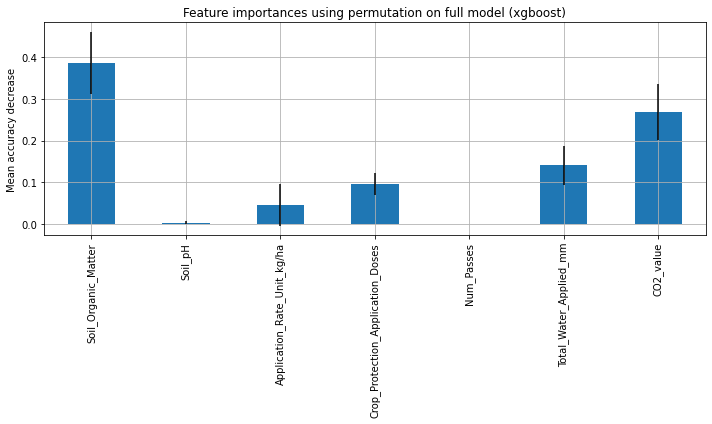

[20:08:47] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:08:58] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:09:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:09:19] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:09:29] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, cols

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted withou

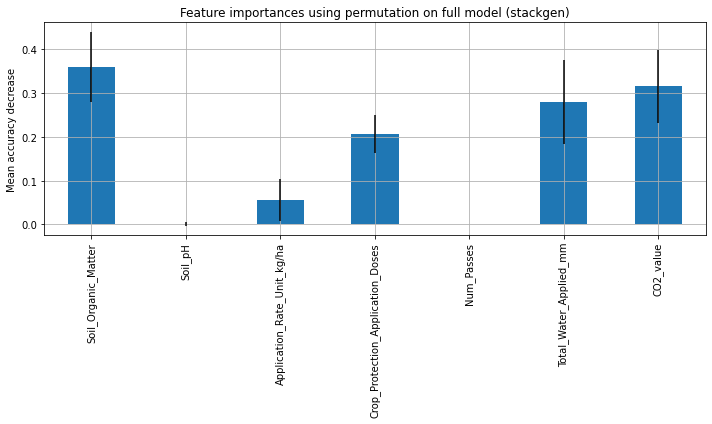

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted withou

In [59]:
from sklearn.inspection import permutation_importance

model_list = [lasso, ridge, elasticnet, svr, lightgbm, gbr, xgboost, stack_gen]
model_names = ['Lasso', 'ridge', 'elasticnet', 'svr', 'lightgbm', 'gbr', 'xgboost', 'stackgen']

for model in model_list:
    feature_names = X_train_yield_per_ha_target.columns
#     feature_names = [f"feature {i}" for i in range(X_train_yield_per_ha_target.shape[1])]
    model.fit(X_train_yield_per_ha_target, y_train_yield_per_ha_target)

    result = permutation_importance(
        model, X_test_yield_per_ha_target, y_test_yield_per_ha_target, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[model_list.index(model)]) + ')')
    ax.set_ylabel("Mean accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

In [ ]:
#Backsolve for LASSO
optimal_alpha_lasso_CO2_value_target = lasso_model_CO2_value_target_train[1].alpha_
coef_lasso_CO2_value_target = lasso_model_CO2_value_target_train.named_steps['lassocv'].coef_
intercept_lasso_CO2_value_target = lasso_model_CO2_value_target_train.named_steps['lassocv'].intercept_

X_test_CO2_target_no_yield = X_test_CO2_target.loc[:,'Soil_Organic_Matter':'Total_Water_Applied_mm'].T
yield_per_ha_coef = coef_lasso_CO2_value_target[3]

coef_lasso_CO2_value_target_no_yield = np.array([coef_lasso_CO2_value_target[:3]])

yield_per_ha_preds = ((np.array([test_CO2_target['CO2_value']]) - np.matmul(coef_lasso_CO2_value_target_no_yield, X_test_CO2_target_no_yield) - intercept_lasso_CO2_value_target)/yield_per_ha_coef).T

yield_per_ha_test_values = np.array([y_test_yield_per_ha_target]).T

def mae(y, y_pred):
    return np.mean(np.absolute(np.subtract(y, y_pred)))

print(rmse(yield_per_ha_test_values, yield_per_ha_preds))
print(mae(yield_per_ha_test_values, yield_per_ha_preds))

In [14]:
OLS_model_CO2_target = smf.ols(formula = 'CO2_value ~ Soil_Organic_Matter + yield_per_ha  + Crop_Protection_Application_Doses + Total_Water_Applied_mm ', data = df_subset)
res2 = OLS_model_CO2_target.fit()
print(res2.summary())

OLS_model_yield_per_ha_target = smf.ols(formula = 'yield_per_ha ~ Soil_Organic_Matter + CO2_value + Crop_Protection_Application_Doses + Total_Water_Applied_mm ', data = df_subset)
res2 = OLS_model_yield_per_ha_target.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:              CO2_value   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     108.5
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.06e-69
Time:                        17:28:33   Log-Likelihood:                -4744.5
No. Observations:                 612   AIC:                             9499.
Df Residuals:                     607   BIC:                             9521.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [10]:
#####Subsetted data frame #3 Models
df_subset_3 = df.loc[(df['Machine'] == 'herbicide spraying')]

df_subset_3 = df_subset_3[['Soil_Organic_Matter', 'Soil_pH', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
                       'Total_Water_Applied_mm', 'yield_per_ha', 'CO2_value']]

df_subset_3 = df_subset_3[~df_subset_3.isna()]

####Yield per Area
df_subset_3_yield_per_area = df_subset_3

####Train / Test Split
train_3_yield_per_ha, test_3_yield_per_ha = train_test_split(df_subset_3_yield_per_area, test_size = 0.2, random_state = 50)

X_3_train_yield_per_ha = train_3_yield_per_ha.drop(columns = ['yield_per_ha'])
X_3_test_yield_per_ha = test_3_yield_per_ha.drop(columns = ['yield_per_ha'])
y_3_train_yield_per_ha = train_3_yield_per_ha['yield_per_ha']
y_3_test_yield_per_ha = test_3_yield_per_ha['yield_per_ha']

In [11]:
yield_per_ha_mean_3 = y_3_train_yield_per_ha.mean()

####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building
model_names_3 = ['Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models_3 = [make_pipeline(MinMaxScaler(), LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds)), \
                  make_pipeline(MinMaxScaler(), RidgeCV(alphas = alphas_alt, cv = kfolds)), \
                  make_pipeline(MinMaxScaler(), ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio)), \
                  make_pipeline(RobustScaler(), SVR(C = 20, epsilon = 0.008, gamma = 0.0003)), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models_3 = []
Test_RMSE_models_3 = []
Test_Scaled_RMSE_models_3 = []

for model_3 in models_3:
    fitted_models_3.append(model_3.fit(X_3_train_yield_per_ha, y_3_train_yield_per_ha))
    Test_RMSE_models_3.append(rmse(y_3_test_yield_per_ha, fitted_models_3[models_3.index(model_3)].predict(X_3_test_yield_per_ha)))
    Test_Scaled_RMSE_models_3.append(Test_RMSE_models_3[models_3.index(model_3)]/yield_per_ha_mean_3)

#stacked model
model_names_3.append('stackgen')
models_3.append(StackingCVRegressor(regressors = (models_3[0], models_3[1], models_3[2], models_3[3], models_3[4], models_3[5], models_3[6]), meta_regressor = models_3[6], use_features_in_secondary = True))
fitted_models_3.append(models_3[7].fit(X_3_train_yield_per_ha, y_3_train_yield_per_ha))
Test_RMSE_models_3.append(rmse(y_3_test_yield_per_ha, fitted_models_3[7].predict(X_3_test_yield_per_ha)))
Test_Scaled_RMSE_models_3.append(Test_RMSE_models_3[7]/yield_per_ha_mean_3)

[17:37:06] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

Lasso
RMSE on test data: 1158.6807221140168
RMSE Scaled on test data: 0.3236373243190023


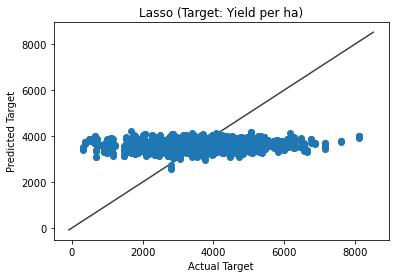

Ridge
RMSE on test data: 1158.4695867904293
RMSE Scaled on test data: 0.32357835097984944


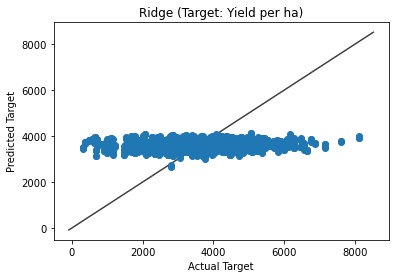

ElasticNet
RMSE on test data: 1158.6251316112264
RMSE Scaled on test data: 0.32362179703764055


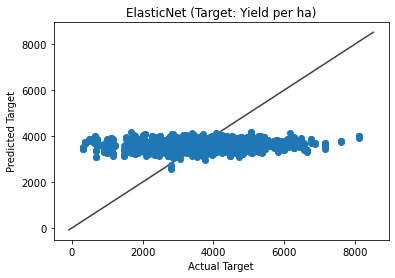

SVR
RMSE on test data: 1168.5259172995654
RMSE Scaled on test data: 0.3263872385675417


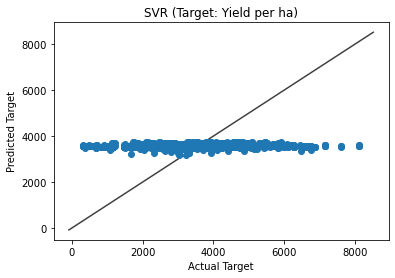

Lightgbm
RMSE on test data: 1029.3439280368925
RMSE Scaled on test data: 0.28751157097536517


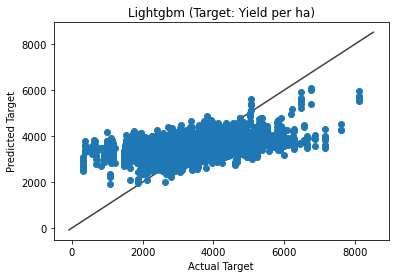

GBR
RMSE on test data: 665.2688630885035
RMSE Scaled on test data: 0.1858198127348505


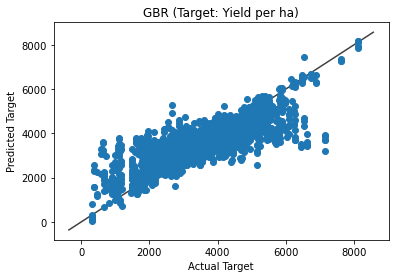

XGBoost
RMSE on test data: 832.7618486468465
RMSE Scaled on test data: 0.23260317648099324


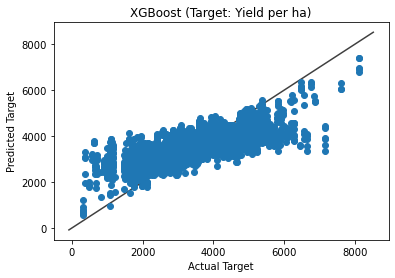

stackgen
RMSE on test data: 634.3671425361027
RMSE Scaled on test data: 0.1771884874995555


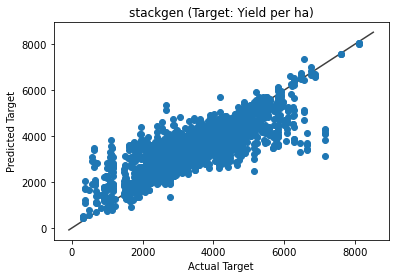

In [12]:
for model_name_3 in model_names_3:
    print(model_name_3)
    print('RMSE on test data: ' + str(Test_RMSE_models_3[model_names_3.index(model_name_3)]))
    print('RMSE Scaled on test data: ' + str(Test_Scaled_RMSE_models_3[model_names_3.index(model_name_3)]))
    fig, ax = plt.subplots()
    ax.scatter(y_3_test_yield_per_ha, fitted_models_3[model_names_3.index(model_name_3)].predict(X_3_test_yield_per_ha))
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name_3 + ' (Target: Yield per ha)')
    plt.show()

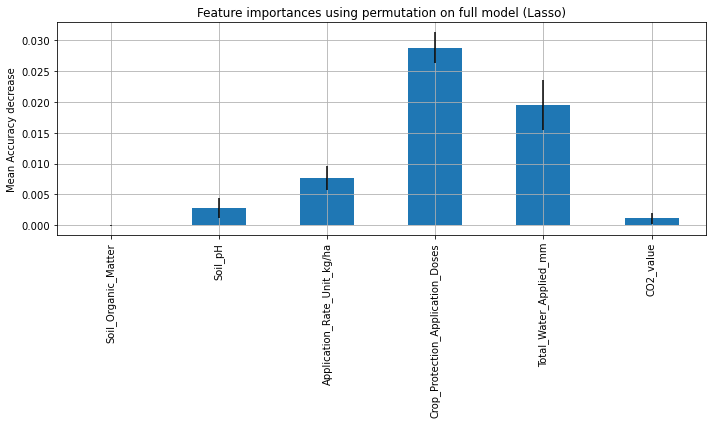

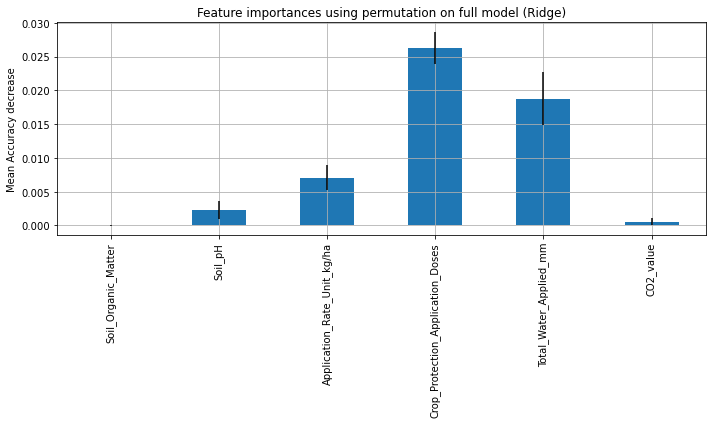

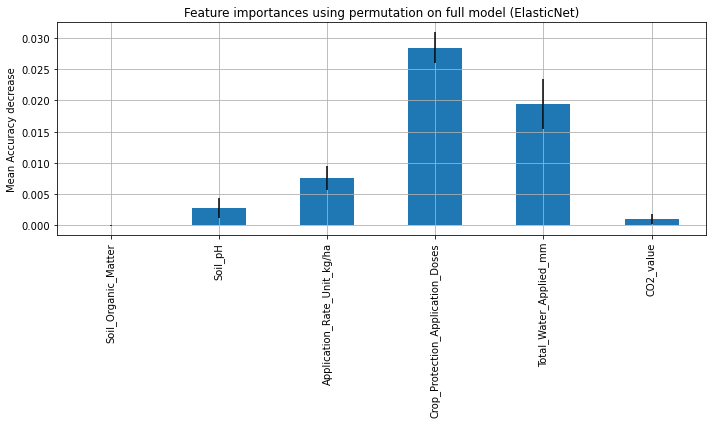

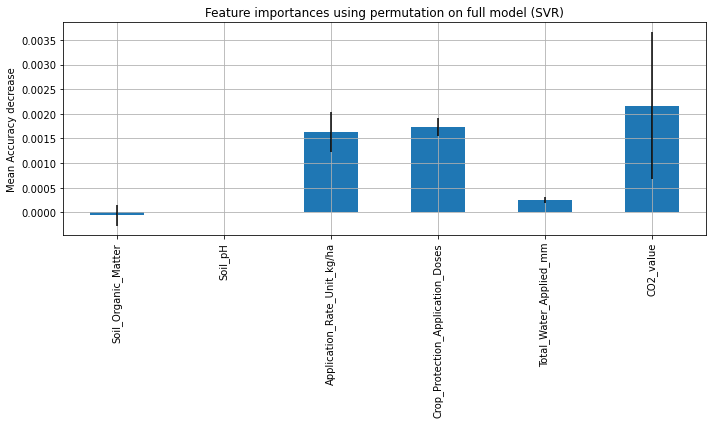

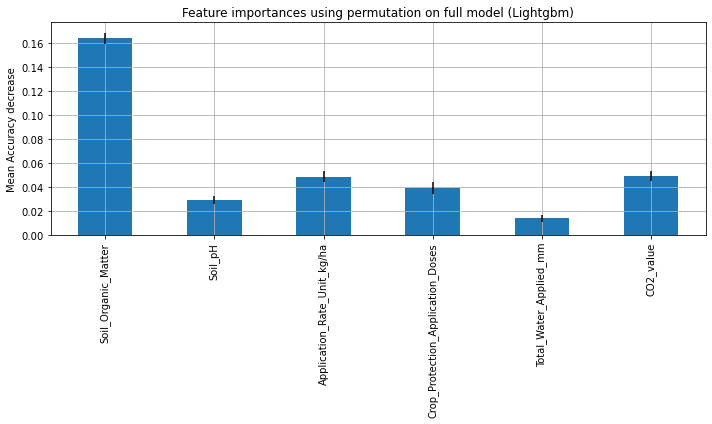

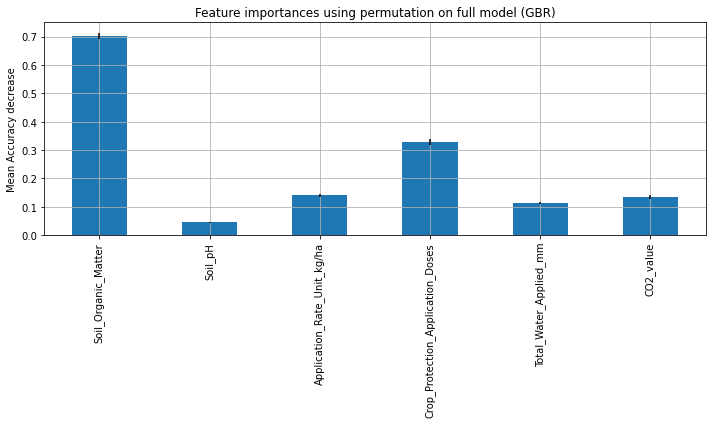

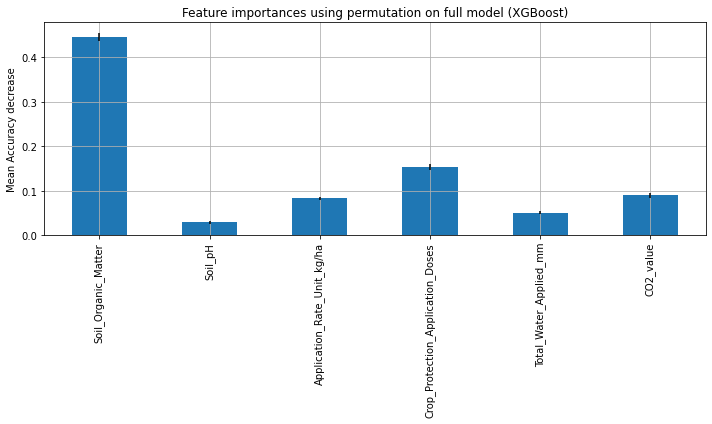

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted withou

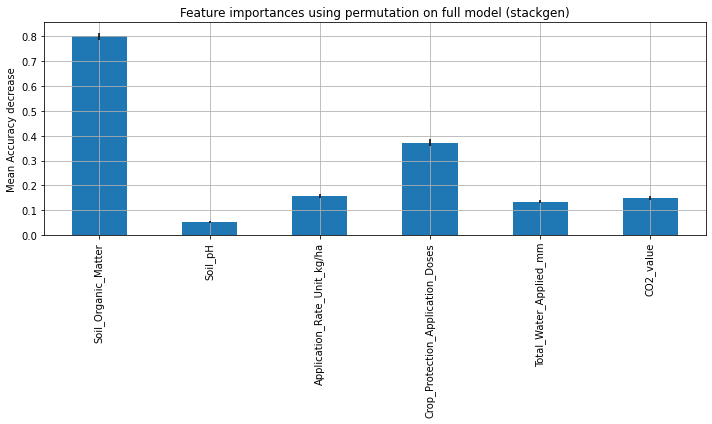

In [13]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models_3)):
    feature_names = X_3_train_yield_per_ha.columns

    result = permutation_importance(
        fitted_models_3[i], X_3_test_yield_per_ha, y_3_test_yield_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names_3[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [14]:
print(display(X_3_train_yield_per_ha))

,Soil_Organic_Matter,Soil_pH,Application_Rate_Unit_kg/ha,Crop_Protection_Application_Doses,Total_Water_Applied_mm,CO2_value
15923,2.535714,5.5,193.0,25,450,1.47
302,2.500000,5.5,5.0,10,350,0.13
20382,2.450000,5.5,120.0,19,350,0.10
18070,3.524375,5.5,150.0,18,350,38209.71
7514,2.500000,5.5,120.0,17,350,2482.93
...,...,...,...,...,...,...
31294,2.111538,5.5,2.5,20,350,1551.83
12503,2.500000,5.5,100.0,23,350,1.45
20243,2.660000,5.5,350.0,24,350,1.54
11200,2.500000,5.5,250.0,19,350,15891.78


None


In [28]:
CO2_min = df_subset_3_yield_per_area['CO2_value'].min()
CO2_max = df_subset_3_yield_per_area['CO2_value'].max()

mean_Soil_pH = df_subset_3_yield_per_area['Soil_pH'].mean()

mean_Total_Water_Applied_mm = df_subset_3_yield_per_area['Total_Water_Applied_mm'].mean()

mean_Application_Rate = df_subset_3_yield_per_area['Application_Rate_Unit_kg/ha'].mean()

Crop_Protection_Application_Doses_min = df_subset_3_yield_per_area['Crop_Protection_Application_Doses'].min()
mean_Crop_Protection_Application_Doses = df_subset_3_yield_per_area['Crop_Protection_Application_Doses'].mean()
Crop_Protection_Application_Doses_max = df_subset_3_yield_per_area['Crop_Protection_Application_Doses'].max()

Soil_Organic_Matter_min = df_subset_3_yield_per_area['Soil_Organic_Matter'].min()
mean_Soil_Organic_Matter = df_subset_3_yield_per_area['Soil_Organic_Matter'].mean()
Soil_Organic_Matter_max = df_subset_3_yield_per_area['Soil_Organic_Matter'].max()

CO2_values = np.linspace(CO2_min, CO2_max, 100)

####min soil organic matter
X_dataframe_1 = pd.DataFrame(data = {'CO2_value': CO2_values, 'Soil_pH': mean_Soil_pH, \
                                          'Total_Water_Applied_mm': mean_Total_Water_Applied_mm, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_min, \
                                          'Soil_Organic_Matter': Soil_Organic_Matter_min})

X_dataframe_2 = pd.DataFrame(data = {'CO2_value': CO2_values, 'Soil_pH': mean_Soil_pH, \
                                          'Total_Water_Applied_mm': mean_Total_Water_Applied_mm, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': mean_Crop_Protection_Application_Doses, \
                                          'Soil_Organic_Matter': Soil_Organic_Matter_min})

X_dataframe_3 = pd.DataFrame(data = {'CO2_value': CO2_values, 'Soil_pH': mean_Soil_pH, \
                                          'Total_Water_Applied_mm': mean_Total_Water_Applied_mm, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_max, \
                                          'Soil_Organic_Matter': Soil_Organic_Matter_min})

####mean soil organic matter
X_dataframe_4 = pd.DataFrame(data = {'CO2_value': CO2_values, 'Soil_pH': mean_Soil_pH, \
                                          'Total_Water_Applied_mm': mean_Total_Water_Applied_mm, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_min, \
                                          'Soil_Organic_Matter': mean_Soil_Organic_Matter})

X_dataframe_5 = pd.DataFrame(data = {'CO2_value': CO2_values, 'Soil_pH': mean_Soil_pH, \
                                          'Total_Water_Applied_mm': mean_Total_Water_Applied_mm, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': mean_Crop_Protection_Application_Doses, \
                                          'Soil_Organic_Matter': mean_Soil_Organic_Matter})


X_dataframe_6 = pd.DataFrame(data = {'CO2_value': CO2_values, 'Soil_pH': mean_Soil_pH, \
                                          'Total_Water_Applied_mm': mean_Total_Water_Applied_mm, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_max, \
                                          'Soil_Organic_Matter': mean_Soil_Organic_Matter})

####max soil organic matter
X_dataframe_7 = pd.DataFrame(data = {'CO2_value': CO2_values, 'Soil_pH': mean_Soil_pH, \
                                          'Total_Water_Applied_mm': mean_Total_Water_Applied_mm, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_min, \
                                          'Soil_Organic_Matter': Soil_Organic_Matter_max})

X_dataframe_8 = pd.DataFrame(data = {'CO2_value': CO2_values, 'Soil_pH': mean_Soil_pH, \
                                          'Total_Water_Applied_mm': mean_Total_Water_Applied_mm, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': mean_Crop_Protection_Application_Doses, \
                                          'Soil_Organic_Matter': Soil_Organic_Matter_max})

X_dataframe_9 = pd.DataFrame(data = {'CO2_value': CO2_values, 'Soil_pH': mean_Soil_pH, \
                                          'Total_Water_Applied_mm': mean_Total_Water_Applied_mm, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_max, \
                                          'Soil_Organic_Matter': Soil_Organic_Matter_max})

dataframe_list = [X_dataframe_1, X_dataframe_2, X_dataframe_3, X_dataframe_4, X_dataframe_5, X_dataframe_6, X_dataframe_7, X_dataframe_8, X_dataframe_9]

17.939955988682804
8
46
2.7734708482874937
0.15
5.907407407407407
17.928481609556744
8
46
2.773133840844958
0.15
5.907407407407407


In [ ]:

yield_pred_values = fitted_models_3[7].predict(X_3_test_yield_per_ha)

# New code here.

tmax_grouped_avg['datetime'] = pd.to_datetime(tmax_grouped_avg.index)
tmax_grouped_avg['Year'] = tmax_grouped_avg['datetime'].dt.year
groups = tmax_grouped_avg.groupby(tmax_grouped_avg['datetime'].dt.month)

f, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for (grp_id, grp_df), ax in zip(groups, axes.ravel()):
    grp_df.plot.scatter(ax=ax, x='CO2 (Emissions per Ha)', y='TMAX', title=f'{calendar.month_name[grp_id]}', legend=False, 
                        sharey=True, sharex=True)

plt.suptitle('Maximum temperature for each month')
plt.tight_layout()
plt.show()

In [141]:
#CO2 values above 0

df = pd.read_csv('/mnt/Datasets/Brazil_CO2_df.csv')

df['yield_per_ha'] = df['Dry_Finished_Yield_Mass_kg']/df['Crop_Area_ha']
df['CO2_value'] = df['value']
df = df.loc[df['result'] == 'emissions_per_area'].reset_index(drop = True)
df = df.drop(columns = ['value', 'Dry_Finished_Yield_Mass_kg', 'Crop_Area_ha'])

print(display(df))

#####Subsetted data frame #3 Models
df_subset_3 = df[df['CO2_value'] >= 0]

df_subset_3 = df_subset_3.loc[(df_subset_3['Machine'] == 'herbicide spraying')]

# df_subset_3 = df_subset_3[['Soil_Organic_Matter', 'Soil_pH', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
#                        'yield_per_ha', 'CO2_value']]

df_subset_3 = df_subset_3[['Soil_Organic_Matter', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
                       'yield_per_ha', 'CO2_value']]

df_subset_3 = df_subset_3[~df_subset_3.isna()]

####Yield per Area
df_subset_3_yield_per_area = df_subset_3

####Train / Test Split
train_3_yield_per_ha, test_3_yield_per_ha = train_test_split(df_subset_3_yield_per_area, test_size = 0.2, random_state = 50)

X_3_train_yield_per_ha = train_3_yield_per_ha.drop(columns = ['yield_per_ha'])
X_3_test_yield_per_ha = test_3_yield_per_ha.drop(columns = ['yield_per_ha'])
y_3_train_yield_per_ha = train_3_yield_per_ha['yield_per_ha']
y_3_test_yield_per_ha = test_3_yield_per_ha['yield_per_ha']

,Unnamed: 0,Harvest_Year,Field_Name,Latitude,Longitude,Total_Wet_Mass_Harvested_kg,Soil_Organic_Matter,Soil_Drainage,Soil_pH,Fertilizer_Type,...,K_as_Potassium_%,K_as_K2O_%,Crop_Protection_Application_Doses,Machine,Num_Passes,Total_Water_Applied_mm,result,unit,yield_per_ha,CO2_value
0,1,2020,M6I2035,"S 19° 23' 25,00""","W 47° 27' 01,70""",182960,2.50,good,5.5,Compose your own NPK,...,16.0,NaN,14,herbicide spraying,15,350,emissions_per_area,kgCO2e/ha,3003.333333,-220.35
1,6,2020,M6I2035,"S 19° 23' 25,00""","W 47° 27' 01,70""",182960,2.50,good,5.5,Compose your own NPK,...,16.0,NaN,14,pneumatic drill,3,350,emissions_per_area,kgCO2e/ha,3003.333333,-220.35
2,11,2020,M6I2035,"S 19° 23' 25,00""","W 47° 27' 01,70""",182960,2.50,good,5.5,Compose your own NPK,...,0.0,NaN,14,herbicide spraying,15,350,emissions_per_area,kgCO2e/ha,3003.333333,-220.35
3,16,2020,M6I2035,"S 19° 23' 25,00""","W 47° 27' 01,70""",182960,2.50,good,5.5,Compose your own NPK,...,0.0,NaN,14,pneumatic drill,3,350,emissions_per_area,kgCO2e/ha,3003.333333,-220.35
4,21,2020,M6I2035,"S 19° 23' 25,00""","W 47° 27' 01,70""",182960,2.50,good,5.5,Compose your own NPK,...,0.0,NaN,14,herbicide spraying,15,350,emissions_per_area,kgCO2e/ha,3003.333333,-220.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6357,31786,2021,M6I21201,"S 16° 24' 41,20""","W 47° 37' 21,20""",954560,3.24,good,5.5,Urea - 46% N,...,NaN,NaN,17,pneumatic drill,3,350,emissions_per_area,kgCO2e/ha,4002.000000,485.73
6358,31791,2021,M6I21201,"S 16° 24' 41,20""","W 47° 37' 21,20""",954560,3.24,good,5.5,Urea - 46% N,...,NaN,NaN,17,herbicide spraying,15,350,emissions_per_area,kgCO2e/ha,4002.000000,485.73
6359,31796,2021,M6I21201,"S 16° 24' 41,20""","W 47° 37' 21,20""",954560,3.24,good,5.5,Urea - 46% N,...,NaN,NaN,17,pneumatic drill,3,350,emissions_per_area,kgCO2e/ha,4002.000000,485.73
6360,31801,2021,M6I21202,"S 16° 25' 19,30""","W 47° 37' 24,00""",831070,4.25,good,5.5,Urea - 46% N,...,NaN,NaN,18,herbicide spraying,15,350,emissions_per_area,kgCO2e/ha,3417.615385,-522.49


None


In [142]:
yield_per_ha_mean_3 = y_3_train_yield_per_ha.mean()

####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building
model_names_3 = ['Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models_3 = [make_pipeline(MinMaxScaler(), LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds)), \
                  make_pipeline(MinMaxScaler(), RidgeCV(alphas = alphas_alt, cv = kfolds)), \
                  make_pipeline(MinMaxScaler(), ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio)), \
                  make_pipeline(RobustScaler(), SVR(C = 20, epsilon = 0.008, gamma = 0.0003)), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models_3 = []
Test_RMSE_models_3 = []
Test_Scaled_RMSE_models_3 = []

for model_3 in models_3:
    fitted_models_3.append(model_3.fit(X_3_train_yield_per_ha, y_3_train_yield_per_ha))
    Test_RMSE_models_3.append(rmse(y_3_test_yield_per_ha, fitted_models_3[models_3.index(model_3)].predict(X_3_test_yield_per_ha)))
    Test_Scaled_RMSE_models_3.append(Test_RMSE_models_3[models_3.index(model_3)]/yield_per_ha_mean_3)

#stacked model
model_names_3.append('stackgen')
models_3.append(StackingCVRegressor(regressors = (models_3[0], models_3[1], models_3[2], models_3[3], models_3[4], models_3[5], models_3[6]), meta_regressor = models_3[6], use_features_in_secondary = True))
fitted_models_3.append(models_3[7].fit(X_3_train_yield_per_ha, y_3_train_yield_per_ha))
Test_RMSE_models_3.append(rmse(y_3_test_yield_per_ha, fitted_models_3[7].predict(X_3_test_yield_per_ha)))
Test_Scaled_RMSE_models_3.append(Test_RMSE_models_3[7]/yield_per_ha_mean_3)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[21:25:07] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted withou

[21:27:49] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:00] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:11] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[21:28:50] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


Lasso
RMSE on test data: 1139.560227151385
RMSE Scaled on test data: 0.3164064178555538


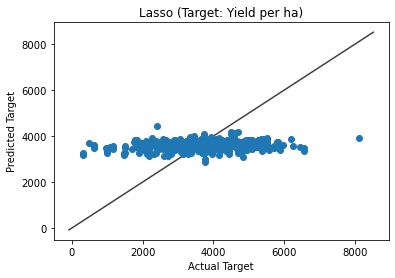

Ridge
RMSE on test data: 1141.148018936475
RMSE Scaled on test data: 0.31684727872367713


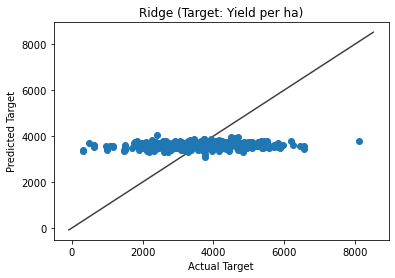

ElasticNet
RMSE on test data: 1139.546577071324
RMSE Scaled on test data: 0.316402627820738


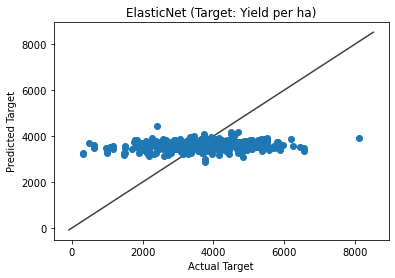

SVR
RMSE on test data: 1151.335122744105
RMSE Scaled on test data: 0.3196757953279748


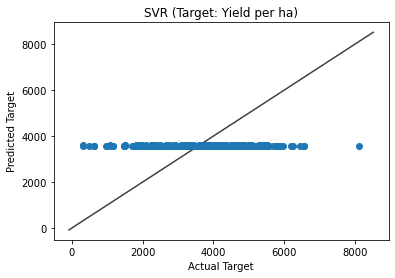

Lightgbm
RMSE on test data: 1019.8930871536304
RMSE Scaled on test data: 0.28318004666466223


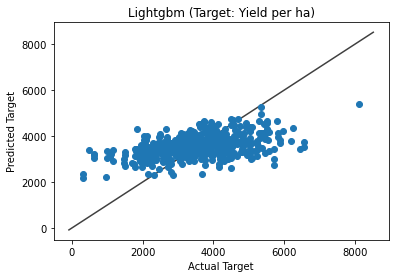

GBR
RMSE on test data: 528.85255763085
RMSE Scaled on test data: 0.1468394029089748


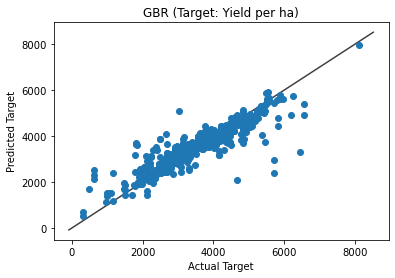

XGBoost
RMSE on test data: 741.6090071451022
RMSE Scaled on test data: 0.20591263525119807


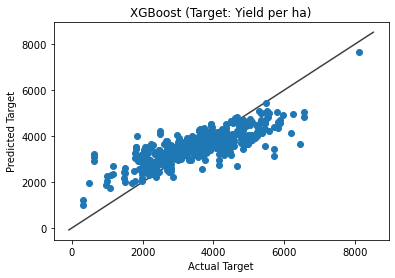

stackgen
RMSE on test data: 519.479418050683
RMSE Scaled on test data: 0.14423688884437436


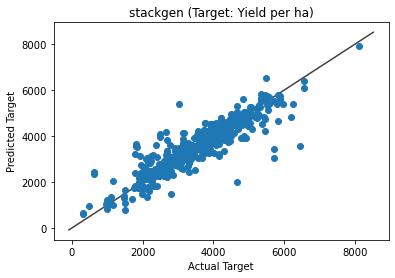

In [143]:
for model_name_3 in model_names_3:
    print(model_name_3)
    print('RMSE on test data: ' + str(Test_RMSE_models_3[model_names_3.index(model_name_3)]))
    print('RMSE Scaled on test data: ' + str(Test_Scaled_RMSE_models_3[model_names_3.index(model_name_3)]))
    fig, ax = plt.subplots()
    ax.scatter(y_3_test_yield_per_ha, fitted_models_3[model_names_3.index(model_name_3)].predict(X_3_test_yield_per_ha))
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name_3 + ' (Target: Yield per ha)')
    plt.show()

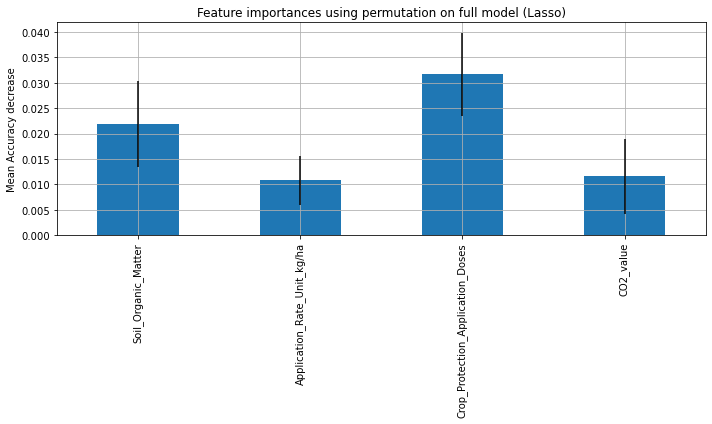

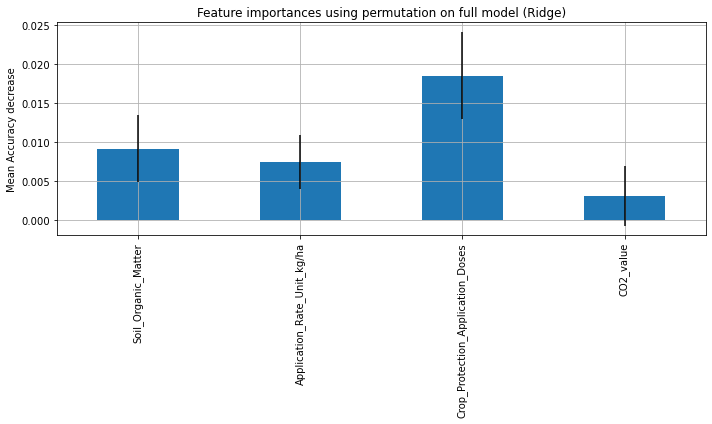

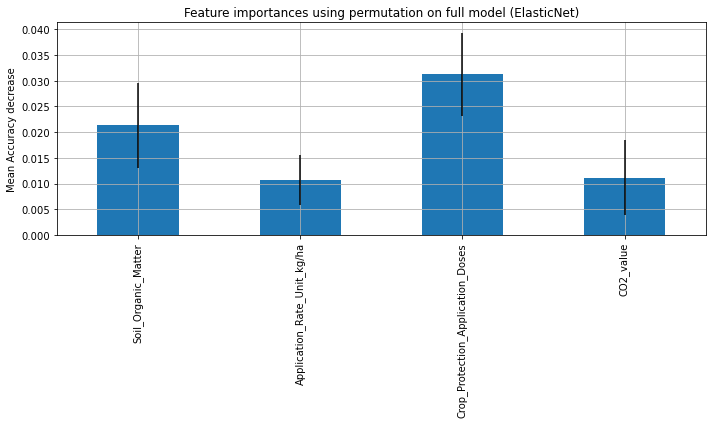

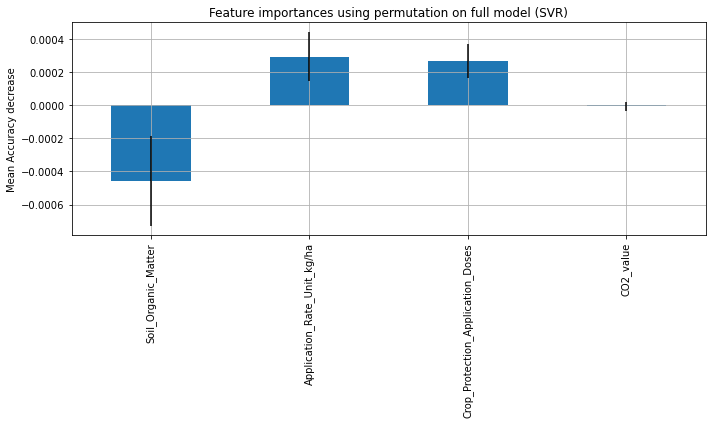

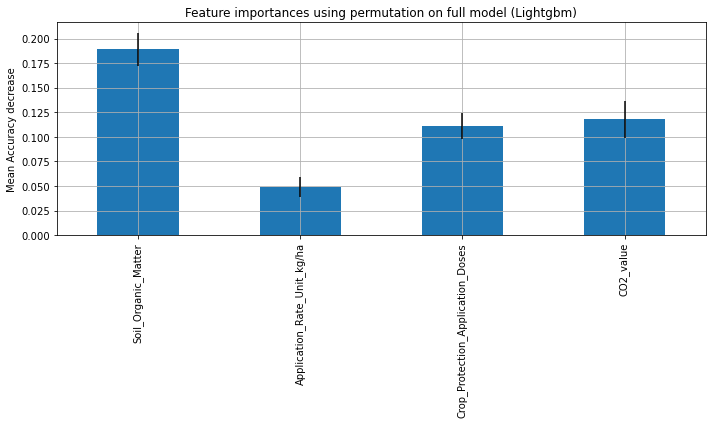

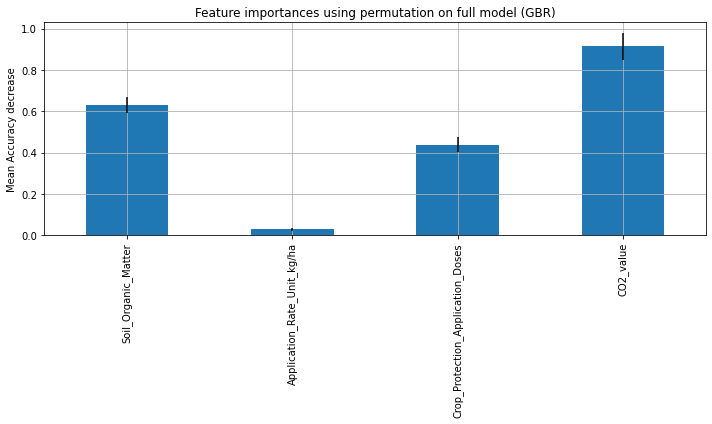

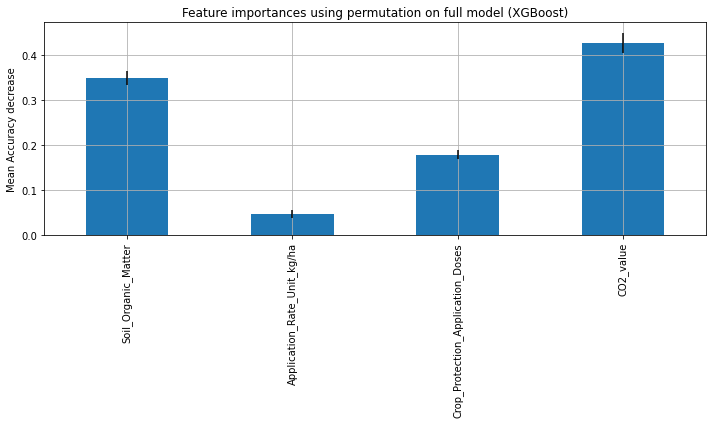

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted withou

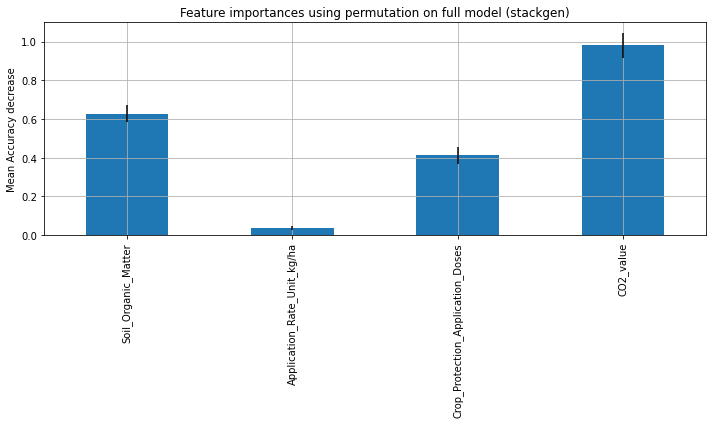

In [147]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models_3)):
    feature_names = X_3_train_yield_per_ha.columns

    result = permutation_importance(
        fitted_models_3[i], X_3_test_yield_per_ha, y_3_test_yield_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names_3[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [148]:
CO2_min = df_subset_3_yield_per_area['CO2_value'].min()
CO2_max = df_subset_3_yield_per_area['CO2_value'].max()

# mean_Soil_pH = df_subset_3_yield_per_area['Soil_pH'].median()

# mean_Total_Water_Applied_mm = df_subset_3_yield_per_area['Total_Water_Applied_mm'].mean()

mean_Application_Rate = df_subset_3_yield_per_area['Application_Rate_Unit_kg/ha'].median()

Crop_Protection_Application_Doses_min = df_subset_3_yield_per_area['Crop_Protection_Application_Doses'].quantile(.25)
mean_Crop_Protection_Application_Doses = df_subset_3_yield_per_area['Crop_Protection_Application_Doses'].median()
Crop_Protection_Application_Doses_max = df_subset_3_yield_per_area['Crop_Protection_Application_Doses'].quantile(.75)

Soil_Organic_Matter_min = df_subset_3_yield_per_area['Soil_Organic_Matter'].quantile(.25)
mean_Soil_Organic_Matter = df_subset_3_yield_per_area['Soil_Organic_Matter'].median()
Soil_Organic_Matter_max = df_subset_3_yield_per_area['Soil_Organic_Matter'].quantile(.75)
#.quantile(.75)

CO2_values = np.linspace(CO2_min, CO2_max, 300)

#no water, no pH
X_dataframe_1 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_min, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_min, \
                                          'Soil_Organic_Matter': Soil_Organic_Matter_min, \
                                    'CO2_value': CO2_values})

X_dataframe_2 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_min, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': mean_Crop_Protection_Application_Doses, \
                                    'CO2_value': CO2_values})

X_dataframe_3 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_min, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_max, \
                                    'CO2_value': CO2_values})

####mean soil organic matter
X_dataframe_4 = pd.DataFrame(data = {'Soil_Organic_Matter': mean_Soil_Organic_Matter, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_min, \
                                    'CO2_value': CO2_values})

X_dataframe_5 = pd.DataFrame(data = {'Soil_Organic_Matter': mean_Soil_Organic_Matter, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': mean_Crop_Protection_Application_Doses, \
                                    'CO2_value': CO2_values})


X_dataframe_6 = pd.DataFrame(data = {'Soil_Organic_Matter': mean_Soil_Organic_Matter, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_max, \
                                    'CO2_value': CO2_values})

####max soil organic matter
X_dataframe_7 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_max, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_min, \
                                    'CO2_value': CO2_values})

X_dataframe_8 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_max, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': mean_Crop_Protection_Application_Doses, \
                                    'CO2_value': CO2_values})

X_dataframe_9 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_max, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_max, \
                                    'CO2_value': CO2_values})

dataframe_list = [X_dataframe_1, X_dataframe_2, X_dataframe_3, X_dataframe_4, X_dataframe_5, X_dataframe_6, X_dataframe_7, X_dataframe_8, X_dataframe_9]

print(display(X_dataframe_9))

,Soil_Organic_Matter,Application_Rate_Unit_kg/ha,Crop_Protection_Application_Doses,CO2_value
0,2.7125,200.0,22.0,1.820000
1,2.7125,200.0,22.0,14.680836
2,2.7125,200.0,22.0,27.541672
3,2.7125,200.0,22.0,40.402508
4,2.7125,200.0,22.0,53.263344
...,...,...,...,...
295,2.7125,200.0,22.0,3795.766656
296,2.7125,200.0,22.0,3808.627492
297,2.7125,200.0,22.0,3821.488328
298,2.7125,200.0,22.0,3834.349164


None


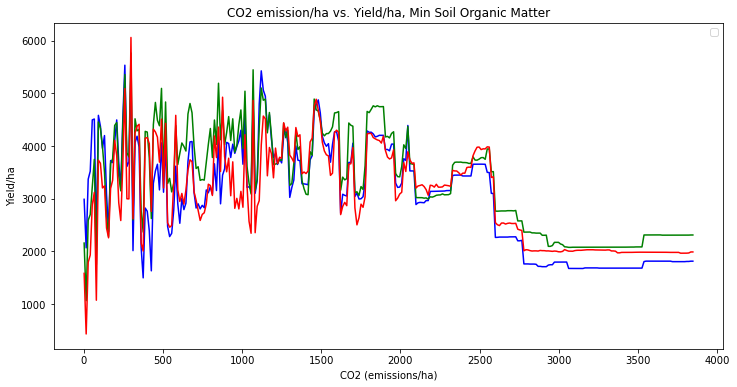

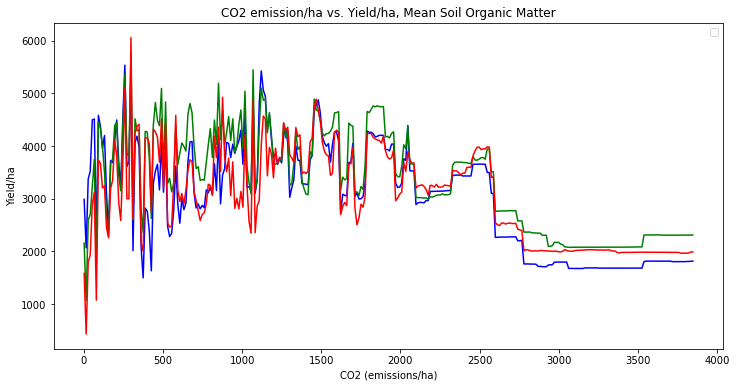

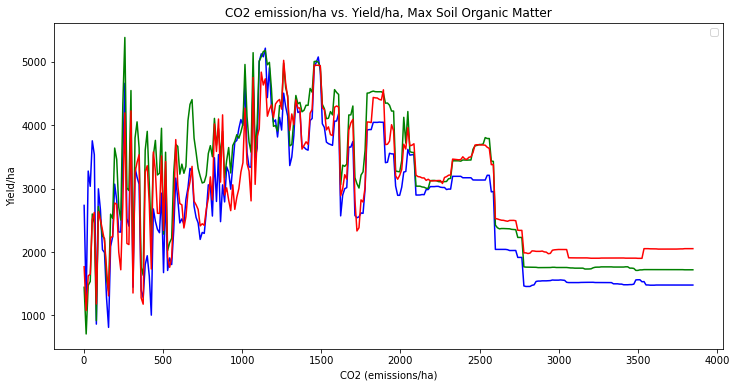

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted withou

In [149]:
plot_name_list = ['Soil Organic Matter = (Minimum)', 'Soil Organic Matter = (Mean)', 'Soil Organic Matter = (Minimum)']

yield_pred_values_1 = fitted_models_3[7].predict(X_dataframe_1)
yield_pred_values_2 = fitted_models_3[7].predict(X_dataframe_2)
yield_pred_values_3 = fitted_models_3[7].predict(X_dataframe_3)

yield_pred_values_4 = fitted_models_3[7].predict(X_dataframe_4)
yield_pred_values_5 = fitted_models_3[7].predict(X_dataframe_5)
yield_pred_values_6 = fitted_models_3[7].predict(X_dataframe_6)

yield_pred_values_7 = fitted_models_3[7].predict(X_dataframe_7)
yield_pred_values_8 = fitted_models_3[7].predict(X_dataframe_8)
yield_pred_values_9 = fitted_models_3[7].predict(X_dataframe_9)

plt.figure(figsize = (12,6))
plt.title('CO2 emission/ha vs. Yield/ha, Min Soil Organic Matter')
plt.xlabel('CO2 (emissions/ha)')
plt.ylabel('Yield/ha')
min_value = plt.plot(X_dataframe_1['CO2_value'], yield_pred_values_1, color = 'blue')
mean_value = plt.plot(X_dataframe_2['CO2_value'], yield_pred_values_2, color = 'green')
max_value = plt.plot(X_dataframe_3['CO2_value'], yield_pred_values_3, color = 'red')
plt.legend((min_value, mean_value, max_value), ('Min Application Rate', 'Mean_Application Rate', 'Max_Application Rate'))
plt.show()

plt.figure(figsize = (12,6))
plt.title('CO2 emission/ha vs. Yield/ha, Mean Soil Organic Matter')
plt.xlabel('CO2 (emissions/ha)')
plt.ylabel('Yield/ha')
min_value = plt.plot(X_dataframe_4['CO2_value'], yield_pred_values_4, color = 'blue')
mean_value = plt.plot(X_dataframe_5['CO2_value'], yield_pred_values_5, color = 'green')
max_value = plt.plot(X_dataframe_6['CO2_value'], yield_pred_values_6, color = 'red')
plt.legend((min_value, mean_value, max_value), ('Min Application Rate', 'Mean_Application Rate', 'Max_Application Rate'))
plt.show()           

plt.figure(figsize = (12,6))
plt.title('CO2 emission/ha vs. Yield/ha, Max Soil Organic Matter')
plt.xlabel('CO2 (emissions/ha)')
plt.ylabel('Yield/ha')
min_value = plt.plot(X_dataframe_4['CO2_value'], yield_pred_values_7, color = 'blue')
mean_value = plt.plot(X_dataframe_5['CO2_value'], yield_pred_values_8, color = 'green')
max_value = plt.plot(X_dataframe_6['CO2_value'], yield_pred_values_9, color = 'red')
plt.legend((min_value, mean_value, max_value), ('Min Application Rate', 'Mean_Application Rate', 'Max_Application Rate'))
plt.show()

,predictions,actual
6254,5424.779297,5291.400000
4090,3373.672607,3495.396825
2834,4031.590088,4065.500000
2038,4536.930176,4225.208333
5420,2403.863281,2400.000000
4040,4131.159180,3840.000000
758,4053.525879,4770.000000
1634,3509.787842,3593.052632
3556,5334.693848,4474.750000
40,3803.339844,3732.777778


None


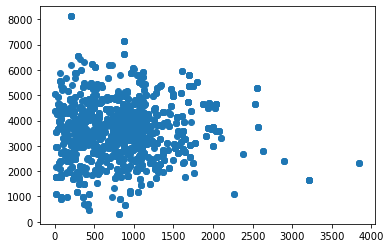

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was 

In [125]:
print(display(pd.DataFrame(data = {'predictions': fitted_models_3[7].predict(X_3_train_yield_per_ha), 'actual': y_3_train_yield_per_ha}).head(10)))

plt.scatter(X_3_train_yield_per_ha['CO2_value'], y_3_train_yield_per_ha)

In [133]:
#CO2 values below 0

df = pd.read_csv('/mnt/Datasets/Brazil_CO2_df.csv')

df['yield_per_ha'] = df['Dry_Finished_Yield_Mass_kg']/df['Crop_Area_ha']
df['CO2_value'] = df['value']
df = df.loc[df['result'] == 'emissions_per_area'].reset_index(drop = True)
df = df.drop(columns = ['value', 'Dry_Finished_Yield_Mass_kg', 'Crop_Area_ha'])

print(display(df))

#####Subsetted data frame #3 Models
df_subset_3 = df[df['CO2_value'] < 0]

df_subset_3 = df_subset_3.loc[(df_subset_3['Machine'] == 'herbicide spraying')]

# df_subset_3 = df_subset_3[['Soil_Organic_Matter', 'Soil_pH', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
#                        'yield_per_ha', 'CO2_value']]

df_subset_3 = df_subset_3[['Soil_Organic_Matter', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
                       'yield_per_ha', 'CO2_value']]

df_subset_3 = df_subset_3[~df_subset_3.isna()]

####Yield per Area
df_subset_3_yield_per_area = df_subset_3

####Train / Test Split
train_3_yield_per_ha, test_3_yield_per_ha = train_test_split(df_subset_3_yield_per_area, test_size = 0.2, random_state = 50)

X_3_train_yield_per_ha = train_3_yield_per_ha.drop(columns = ['yield_per_ha'])
X_3_test_yield_per_ha = test_3_yield_per_ha.drop(columns = ['yield_per_ha'])
y_3_train_yield_per_ha = train_3_yield_per_ha['yield_per_ha']
y_3_test_yield_per_ha = test_3_yield_per_ha['yield_per_ha']

,Unnamed: 0,Harvest_Year,Field_Name,Latitude,Longitude,Total_Wet_Mass_Harvested_kg,Soil_Organic_Matter,Soil_Drainage,Soil_pH,Fertilizer_Type,...,K_as_Potassium_%,K_as_K2O_%,Crop_Protection_Application_Doses,Machine,Num_Passes,Total_Water_Applied_mm,result,unit,yield_per_ha,CO2_value
0,1,2020,M6I2035,"S 19° 23' 25,00""","W 47° 27' 01,70""",182960,2.50,good,5.5,Compose your own NPK,...,16.0,NaN,14,herbicide spraying,15,350,emissions_per_area,kgCO2e/ha,3003.333333,-220.35
1,6,2020,M6I2035,"S 19° 23' 25,00""","W 47° 27' 01,70""",182960,2.50,good,5.5,Compose your own NPK,...,16.0,NaN,14,pneumatic drill,3,350,emissions_per_area,kgCO2e/ha,3003.333333,-220.35
2,11,2020,M6I2035,"S 19° 23' 25,00""","W 47° 27' 01,70""",182960,2.50,good,5.5,Compose your own NPK,...,0.0,NaN,14,herbicide spraying,15,350,emissions_per_area,kgCO2e/ha,3003.333333,-220.35
3,16,2020,M6I2035,"S 19° 23' 25,00""","W 47° 27' 01,70""",182960,2.50,good,5.5,Compose your own NPK,...,0.0,NaN,14,pneumatic drill,3,350,emissions_per_area,kgCO2e/ha,3003.333333,-220.35
4,21,2020,M6I2035,"S 19° 23' 25,00""","W 47° 27' 01,70""",182960,2.50,good,5.5,Compose your own NPK,...,0.0,NaN,14,herbicide spraying,15,350,emissions_per_area,kgCO2e/ha,3003.333333,-220.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6357,31786,2021,M6I21201,"S 16° 24' 41,20""","W 47° 37' 21,20""",954560,3.24,good,5.5,Urea - 46% N,...,NaN,NaN,17,pneumatic drill,3,350,emissions_per_area,kgCO2e/ha,4002.000000,485.73
6358,31791,2021,M6I21201,"S 16° 24' 41,20""","W 47° 37' 21,20""",954560,3.24,good,5.5,Urea - 46% N,...,NaN,NaN,17,herbicide spraying,15,350,emissions_per_area,kgCO2e/ha,4002.000000,485.73
6359,31796,2021,M6I21201,"S 16° 24' 41,20""","W 47° 37' 21,20""",954560,3.24,good,5.5,Urea - 46% N,...,NaN,NaN,17,pneumatic drill,3,350,emissions_per_area,kgCO2e/ha,4002.000000,485.73
6360,31801,2021,M6I21202,"S 16° 25' 19,30""","W 47° 37' 24,00""",831070,4.25,good,5.5,Urea - 46% N,...,NaN,NaN,18,herbicide spraying,15,350,emissions_per_area,kgCO2e/ha,3417.615385,-522.49


None


In [134]:
yield_per_ha_mean_3 = y_3_train_yield_per_ha.mean()

####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building
model_names_3 = ['Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models_3 = [make_pipeline(MinMaxScaler(), LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds)), \
                  make_pipeline(MinMaxScaler(), RidgeCV(alphas = alphas_alt, cv = kfolds)), \
                  make_pipeline(MinMaxScaler(), ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio)), \
                  make_pipeline(RobustScaler(), SVR(C = 20, epsilon = 0.008, gamma = 0.0003)), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models_3 = []
Test_RMSE_models_3 = []
Test_Scaled_RMSE_models_3 = []

for model_3 in models_3:
    fitted_models_3.append(model_3.fit(X_3_train_yield_per_ha, y_3_train_yield_per_ha))
    Test_RMSE_models_3.append(rmse(y_3_test_yield_per_ha, fitted_models_3[models_3.index(model_3)].predict(X_3_test_yield_per_ha)))
    Test_Scaled_RMSE_models_3.append(Test_RMSE_models_3[models_3.index(model_3)]/yield_per_ha_mean_3)

#stacked model
model_names_3.append('stackgen')
models_3.append(StackingCVRegressor(regressors = (models_3[0], models_3[1], models_3[2], models_3[3], models_3[4], models_3[5], models_3[6]), meta_regressor = models_3[6], use_features_in_secondary = True))
fitted_models_3.append(models_3[7].fit(X_3_train_yield_per_ha, y_3_train_yield_per_ha))
Test_RMSE_models_3.append(rmse(y_3_test_yield_per_ha, fitted_models_3[7].predict(X_3_test_yield_per_ha)))
Test_Scaled_RMSE_models_3.append(Test_RMSE_models_3[7]/yield_per_ha_mean_3)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[21:19:26] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

Lasso
RMSE on test data: 1236.6317052653903
RMSE Scaled on test data: 0.3446736696314503


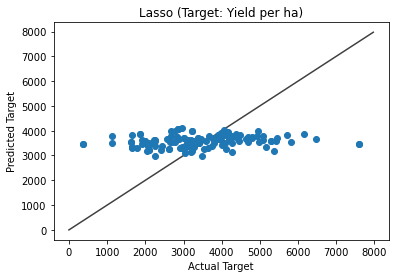

Ridge
RMSE on test data: 1243.2316042530058
RMSE Scaled on test data: 0.3465131917733884


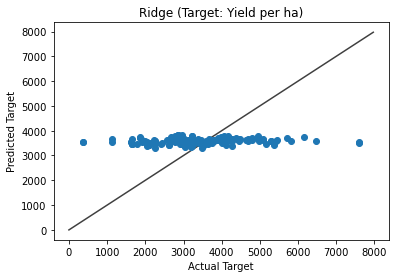

ElasticNet
RMSE on test data: 1236.6189348627333
RMSE Scaled on test data: 0.34467011026811867


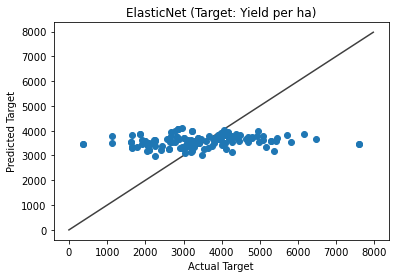

SVR
RMSE on test data: 1257.9420499837686
RMSE Scaled on test data: 0.3506132834096838


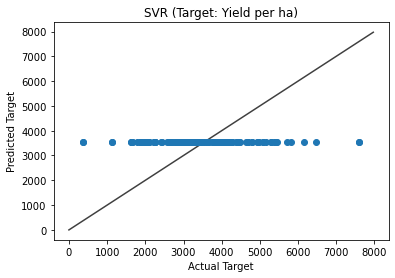

Lightgbm
RMSE on test data: 937.9013010275609
RMSE Scaled on test data: 0.26141160848524814


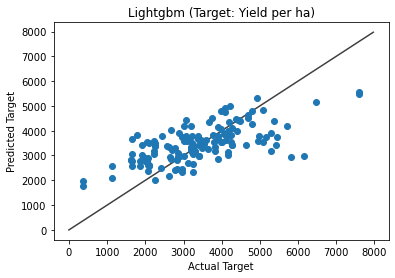

GBR
RMSE on test data: 624.8453794703913
RMSE Scaled on test data: 0.17415674285020563


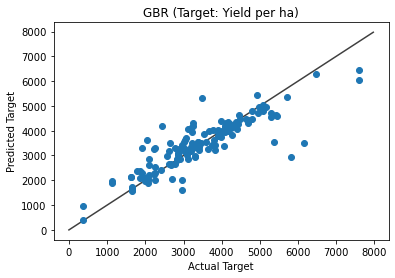

XGBoost
RMSE on test data: 596.2766550062607
RMSE Scaled on test data: 0.1661940753431256


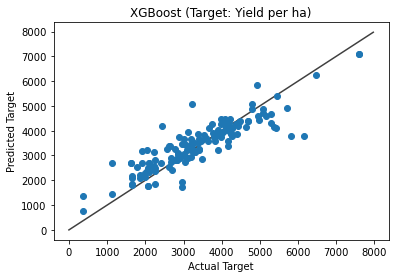

stackgen
RMSE on test data: 591.5938057819944
RMSE Scaled on test data: 0.16488887281630518


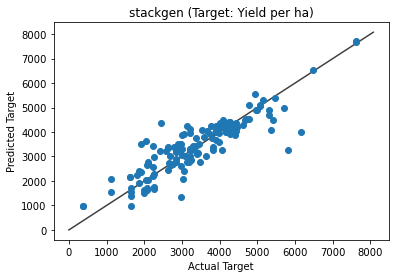

In [135]:
for model_name_3 in model_names_3:
    print(model_name_3)
    print('RMSE on test data: ' + str(Test_RMSE_models_3[model_names_3.index(model_name_3)]))
    print('RMSE Scaled on test data: ' + str(Test_Scaled_RMSE_models_3[model_names_3.index(model_name_3)]))
    fig, ax = plt.subplots()
    ax.scatter(y_3_test_yield_per_ha, fitted_models_3[model_names_3.index(model_name_3)].predict(X_3_test_yield_per_ha))
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name_3 + ' (Target: Yield per ha)')
    plt.show()

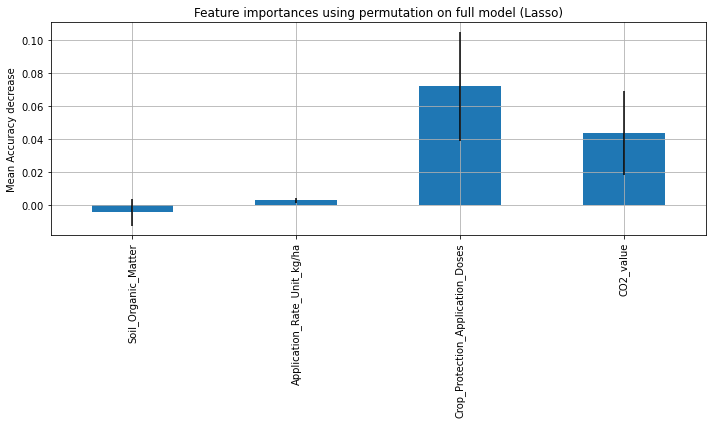

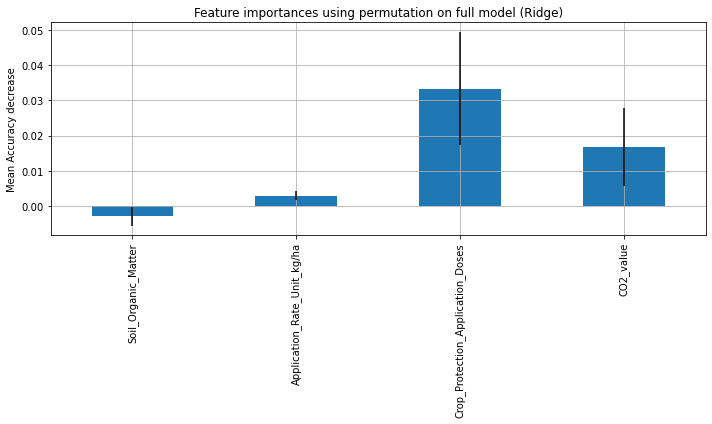

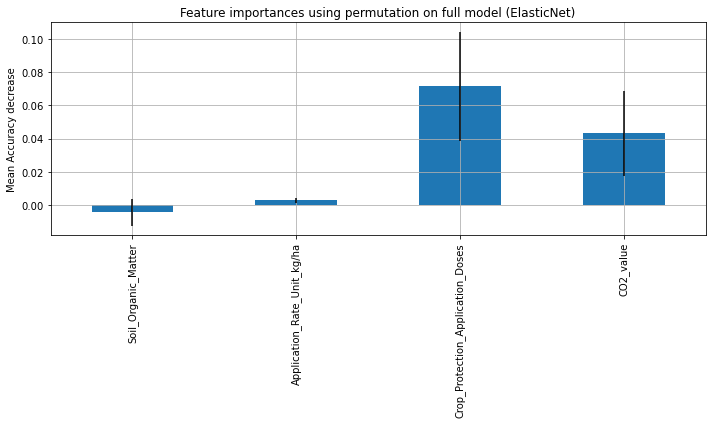

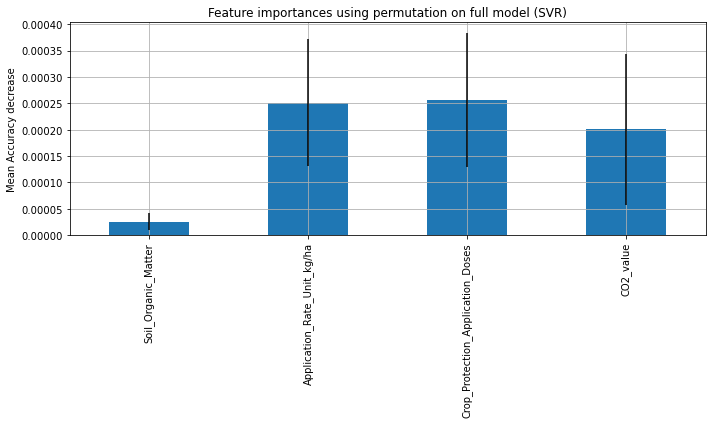

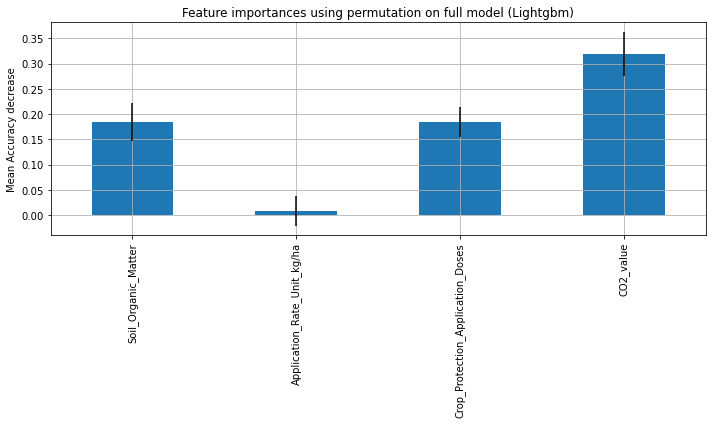

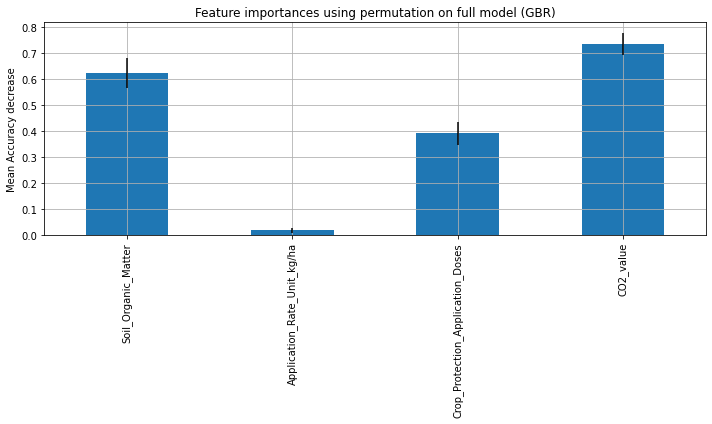

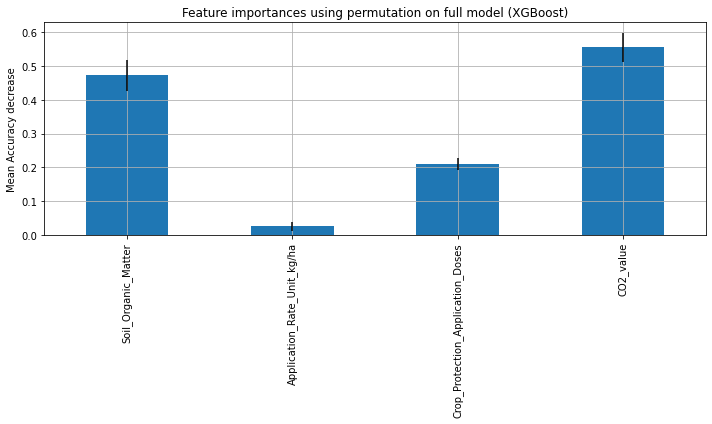

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted withou

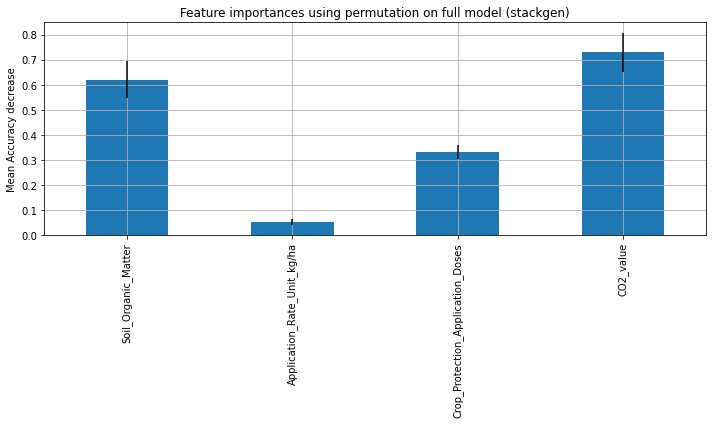

In [136]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models_3)):
    feature_names = X_3_train_yield_per_ha.columns

    result = permutation_importance(
        fitted_models_3[i], X_3_test_yield_per_ha, y_3_test_yield_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names_3[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [139]:
CO2_min = df_subset_3_yield_per_area['CO2_value'].min()
CO2_max = df_subset_3_yield_per_area['CO2_value'].max()

# mean_Soil_pH = df_subset_3_yield_per_area['Soil_pH'].mean()

# mean_Total_Water_Applied_mm = df_subset_3_yield_per_area['Total_Water_Applied_mm'].mean()

mean_Application_Rate = df_subset_3_yield_per_area['Application_Rate_Unit_kg/ha'].median()

Crop_Protection_Application_Doses_min = df_subset_3_yield_per_area['Crop_Protection_Application_Doses'].quantile(.25)
mean_Crop_Protection_Application_Doses = df_subset_3_yield_per_area['Crop_Protection_Application_Doses'].median()
Crop_Protection_Application_Doses_max = df_subset_3_yield_per_area['Crop_Protection_Application_Doses'].quantile(.75)

Soil_Organic_Matter_min = df_subset_3_yield_per_area['Soil_Organic_Matter'].quantile(.25)
mean_Soil_Organic_Matter = df_subset_3_yield_per_area['Soil_Organic_Matter'].median()
Soil_Organic_Matter_max = df_subset_3_yield_per_area['Soil_Organic_Matter'].quantile(.75)
#.quantile(.75)

CO2_values = np.linspace(CO2_min, CO2_max, 300)

#no water, no pH
X_dataframe_1 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_min, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_min, \
                                          'Soil_Organic_Matter': Soil_Organic_Matter_min, \
                                    'CO2_value': CO2_values})

X_dataframe_2 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_min, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': mean_Crop_Protection_Application_Doses, \
                                    'CO2_value': CO2_values})

X_dataframe_3 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_min, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_max, \
                                    'CO2_value': CO2_values})

####mean soil organic matter
X_dataframe_4 = pd.DataFrame(data = {'Soil_Organic_Matter': mean_Soil_Organic_Matter, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_min, \
                                    'CO2_value': CO2_values})

X_dataframe_5 = pd.DataFrame(data = {'Soil_Organic_Matter': mean_Soil_Organic_Matter, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': mean_Crop_Protection_Application_Doses, \
                                    'CO2_value': CO2_values})


X_dataframe_6 = pd.DataFrame(data = {'Soil_Organic_Matter': mean_Soil_Organic_Matter, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_max, \
                                    'CO2_value': CO2_values})

####max soil organic matter
X_dataframe_7 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_max, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_min, \
                                    'CO2_value': CO2_values})

X_dataframe_8 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_max, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': mean_Crop_Protection_Application_Doses, \
                                    'CO2_value': CO2_values})

X_dataframe_9 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_max, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_max, \
                                    'CO2_value': CO2_values})

dataframe_list = [X_dataframe_1, X_dataframe_2, X_dataframe_3, X_dataframe_4, X_dataframe_5, X_dataframe_6, X_dataframe_7, X_dataframe_8, X_dataframe_9]

print(display(X_dataframe_9))

,Soil_Organic_Matter,Application_Rate_Unit_kg/ha,Crop_Protection_Application_Doses,CO2_value
0,4.0,200.0,19.0,-2246.650000
1,4.0,200.0,19.0,-2239.139365
2,4.0,200.0,19.0,-2231.628729
3,4.0,200.0,19.0,-2224.118094
4,4.0,200.0,19.0,-2216.607458
...,...,...,...,...
295,4.0,200.0,19.0,-31.012542
296,4.0,200.0,19.0,-23.501906
297,4.0,200.0,19.0,-15.991271
298,4.0,200.0,19.0,-8.480635


None


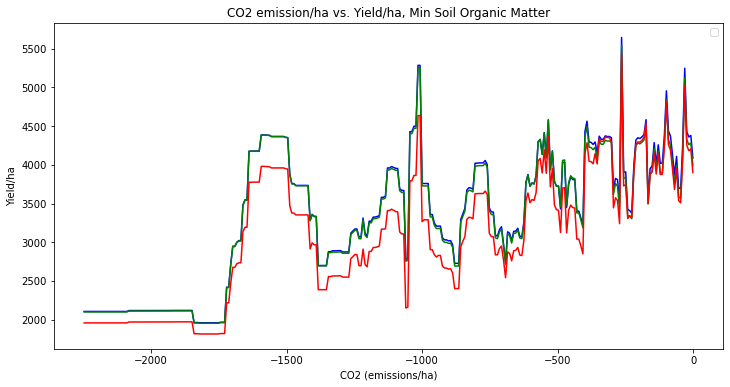

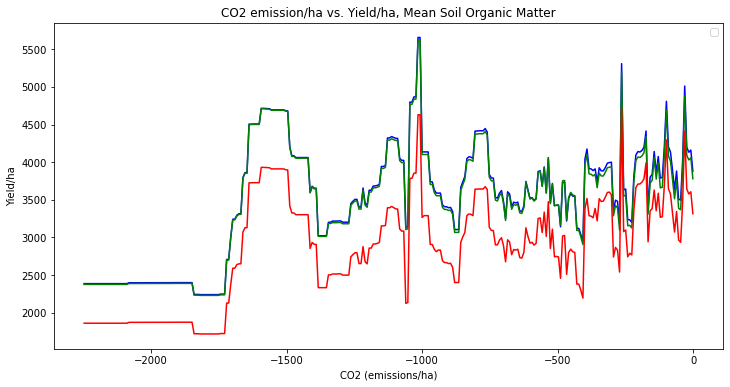

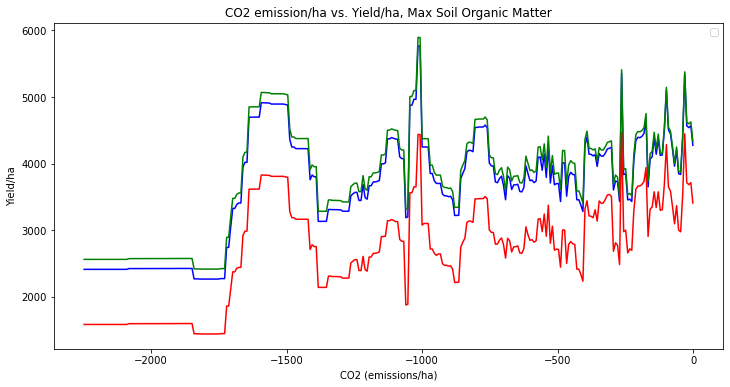

In [140]:
plot_name_list = ['Soil Organic Matter = (Minimum)', 'Soil Organic Matter = (Mean)', 'Soil Organic Matter = (Minimum)']

yield_pred_values_1 = fitted_models_3[6].predict(X_dataframe_1)
yield_pred_values_2 = fitted_models_3[6].predict(X_dataframe_2)
yield_pred_values_3 = fitted_models_3[6].predict(X_dataframe_3)

yield_pred_values_4 = fitted_models_3[6].predict(X_dataframe_4)
yield_pred_values_5 = fitted_models_3[6].predict(X_dataframe_5)
yield_pred_values_6 = fitted_models_3[6].predict(X_dataframe_6)

yield_pred_values_7 = fitted_models_3[6].predict(X_dataframe_7)
yield_pred_values_8 = fitted_models_3[6].predict(X_dataframe_8)
yield_pred_values_9 = fitted_models_3[6].predict(X_dataframe_9)

plt.figure(figsize = (12,6))
plt.title('CO2 emission/ha vs. Yield/ha, Min Soil Organic Matter')
plt.xlabel('CO2 (emissions/ha)')
plt.ylabel('Yield/ha')
min_value = plt.plot(X_dataframe_1['CO2_value'], yield_pred_values_1, color = 'blue')
mean_value = plt.plot(X_dataframe_2['CO2_value'], yield_pred_values_2, color = 'green')
max_value = plt.plot(X_dataframe_3['CO2_value'], yield_pred_values_3, color = 'red')
plt.legend((min_value, mean_value, max_value), ('Min Application Rate', 'Mean_Application Rate', 'Max_Application Rate'))
plt.show()

plt.figure(figsize = (12,6))
plt.title('CO2 emission/ha vs. Yield/ha, Mean Soil Organic Matter')
plt.xlabel('CO2 (emissions/ha)')
plt.ylabel('Yield/ha')
min_value = plt.plot(X_dataframe_4['CO2_value'], yield_pred_values_4, color = 'blue')
mean_value = plt.plot(X_dataframe_5['CO2_value'], yield_pred_values_5, color = 'green')
max_value = plt.plot(X_dataframe_6['CO2_value'], yield_pred_values_6, color = 'red')
plt.legend((min_value, mean_value, max_value), ('Min Application Rate', 'Mean_Application Rate', 'Max_Application Rate'))
plt.show()           

plt.figure(figsize = (12,6))
plt.title('CO2 emission/ha vs. Yield/ha, Max Soil Organic Matter')
plt.xlabel('CO2 (emissions/ha)')
plt.ylabel('Yield/ha')
min_value = plt.plot(X_dataframe_4['CO2_value'], yield_pred_values_7, color = 'blue')
mean_value = plt.plot(X_dataframe_5['CO2_value'], yield_pred_values_8, color = 'green')
max_value = plt.plot(X_dataframe_6['CO2_value'], yield_pred_values_9, color = 'red')
plt.legend((min_value, mean_value, max_value), ('Min Application Rate', 'Mean_Application Rate', 'Max_Application Rate'))
plt.show()

In [96]:
#all CO2 values

df = pd.read_csv('/mnt/Datasets/Brazil_CO2_df.csv')

df['yield_per_ha'] = df['Dry_Finished_Yield_Mass_kg']/df['Crop_Area_ha']
df['CO2_value'] = df['value']
df = df.loc[df['result'] == 'emissions_per_area'].reset_index(drop = True)
df = df.drop(columns = ['value', 'Dry_Finished_Yield_Mass_kg', 'Crop_Area_ha'])

#####Subsetted data frame #3 Models

df_subset = df.loc[(df['Machine'] == 'herbicide spraying')]

df_subset = df_subset[['Soil_Organic_Matter', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
                       'yield_per_ha', 'CO2_value']]

df_subset['Crop_Protection_Application_Doses'] = df_subset['Crop_Protection_Application_Doses'].astype('float64')

df_subset = df_subset[~df_subset.isna()]

df_subset_yield_per_ha = df_subset

#yeo-johnson scaling and train/test split

train_yield_per_ha, test_yield_per_ha = train_test_split(df_subset_yield_per_ha, test_size = 0.2, random_state = 50)
#x values
X_train_yield_per_ha = train_yield_per_ha.drop(columns = ['yield_per_ha'])
X_test_yield_per_ha = test_yield_per_ha.drop(columns = ['yield_per_ha'])

#outliers removed
X_train_yield_per_ha = X_train_yield_per_ha[X_train_yield_per_ha['Soil_Organic_Matter']]

standard_scaler_X = StandardScaler().fit(X_train_yield_per_ha[['Soil_Organic_Matter', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
                       'CO2_value']])

X_train_yield_per_ha[['Soil_Organic_Matter', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
                       'CO2_value']] = standard_scaler_X.transform(X_train_yield_per_ha[['Soil_Organic_Matter', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
                       'CO2_value']])

power_transform_X = PowerTransformer(standardize = False).fit(X_train_yield_per_ha[['Soil_Organic_Matter', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
                       'CO2_value']])

X_train_yield_per_ha[['Soil_Organic_Matter', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
                       'CO2_value']] = power_transform_X.transform(X_train_yield_per_ha[['Soil_Organic_Matter', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
                       'CO2_value']])

X_test_yield_per_ha[['Soil_Organic_Matter', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
                       'CO2_value']] = standard_scaler_X.transform(X_test_yield_per_ha[['Soil_Organic_Matter', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
                       'CO2_value']])

X_test_yield_per_ha[['Soil_Organic_Matter', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
                       'CO2_value']] = power_transform_X.transform(X_test_yield_per_ha[['Soil_Organic_Matter', 'Application_Rate_Unit_kg/ha', 'Crop_Protection_Application_Doses',\
                       'CO2_value']])
#y_values
y_train_yield_per_ha = np.array(train_yield_per_ha['yield_per_ha']).reshape(-1, 1)
mean_yield_per_ha = y_train_yield_per_ha.mean()

y_test_yield_per_ha = np.array(test_yield_per_ha['yield_per_ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_yield_per_ha))

y_train_yield_per_ha = standard_scaler_y.transform(y_train_yield_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_yield_per_ha)

y_train_yield_per_ha = power_transform_y.transform(y_train_yield_per_ha)

y_test_yield_per_ha = standard_scaler_y.transform(y_test_yield_per_ha)

y_test_yield_per_ha = power_transform_y.transform(y_test_yield_per_ha)

In [126]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            make_pipeline(LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds)), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_RMSE_models = []
Test_Scaled_RMSE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_yield_per_ha, y_train_yield_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_yield_per_ha.reshape(-1, 1)))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform((fitted_models[models.index(model)].predict(X_test_yield_per_ha)).reshape(-1,1)))                                                   
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_Scaled_RMSE_models.append(Test_RMSE_models[models.index(model)]/mean_yield_per_ha)
                                                                                                    
# #stacked model
model_names.append('stackgen')
models.append(StackingCVRegressor(regressors = (models[0], models[1], models[2], models[3], models[4], models[5], models[6], models[7]), meta_regressor = models[6], use_features_in_secondary = True))
fitted_models.append(models[8].fit(X_train_yield_per_ha, y_train_yield_per_ha))
inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_yield_per_ha.reshape(-1, 1)))
inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform((fitted_models[8].predict(X_test_yield_per_ha)).reshape(-1,1)))                                                      
Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
Test_Scaled_RMSE_models.append(Test_RMSE_models[models.index(model)]/mean_yield_per_ha)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[20:28:17] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

OLS
RMSE on test data: 1143.4478485495183
RMSE Scaled on test data: 0.3203850920792953


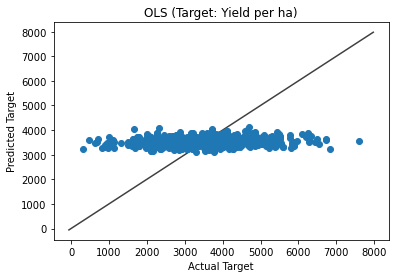

Lasso
RMSE on test data: 1143.4515517195687
RMSE Scaled on test data: 0.3203861296784119


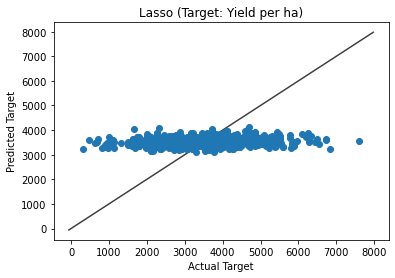

Ridge
RMSE on test data: 1143.4472939248665
RMSE Scaled on test data: 0.32038493667783086


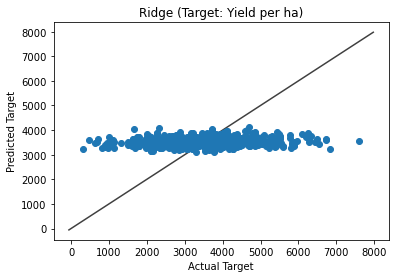

ElasticNet
RMSE on test data: 1143.4537973662966
RMSE Scaled on test data: 0.3203867588909594


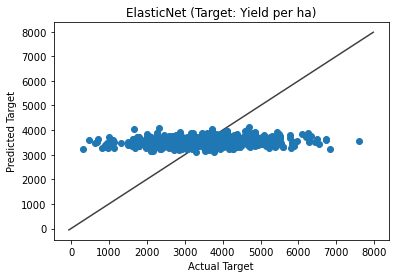

SVR
RMSE on test data: 1145.9720608734594
RMSE Scaled on test data: 0.32109235651541224


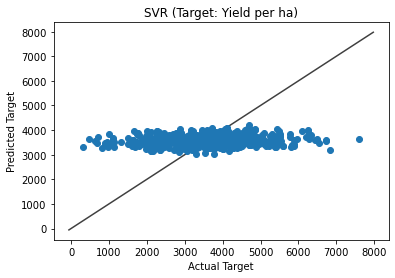

Lightgbm
RMSE on test data: 1022.3979424540801
RMSE Scaled on test data: 0.2864678606465077


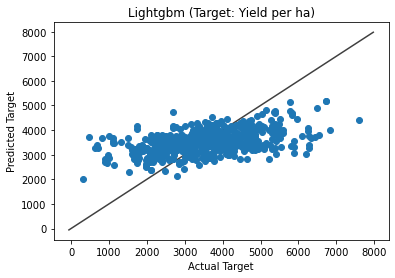

GBR
RMSE on test data: 593.5733412749245
RMSE Scaled on test data: 0.16631458080175487


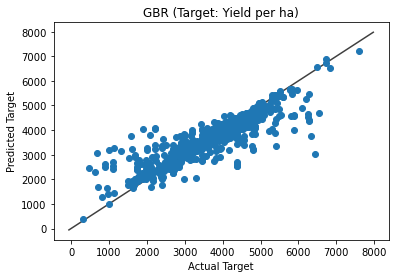

XGBoost
RMSE on test data: 782.3300589928634
RMSE Scaled on test data: 0.2192027282265462


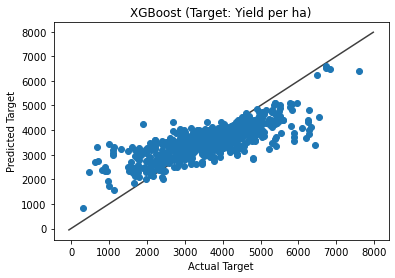

stackgen
RMSE on test data: 624.6460077815631
RMSE Scaled on test data: 0.2192027282265462


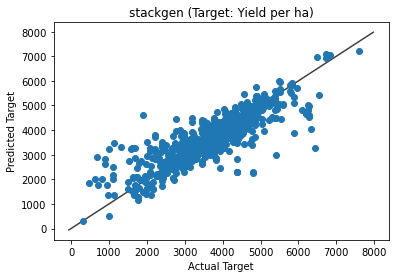

In [129]:
for model_name in model_names:
    print(model_name)
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('RMSE Scaled on test data: ' + str(Test_Scaled_RMSE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_yield_per_ha.reshape(-1, 1)))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform((fitted_models[model_names.index(model_name)].predict(X_test_yield_per_ha)).reshape(-1,1))) 
    fig, ax = plt.subplots()
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield per ha)')
    plt.show()

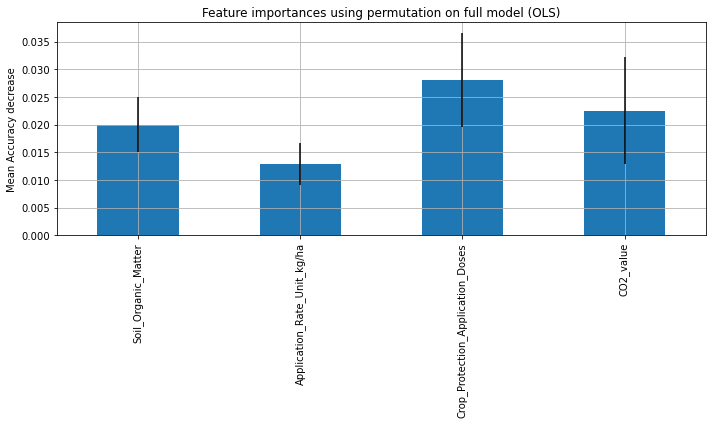

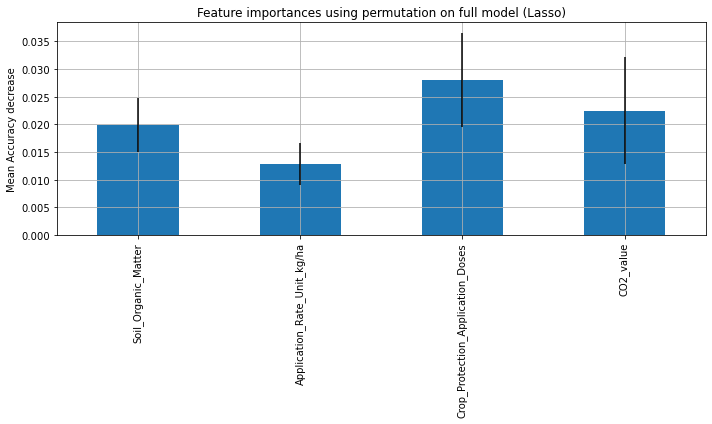

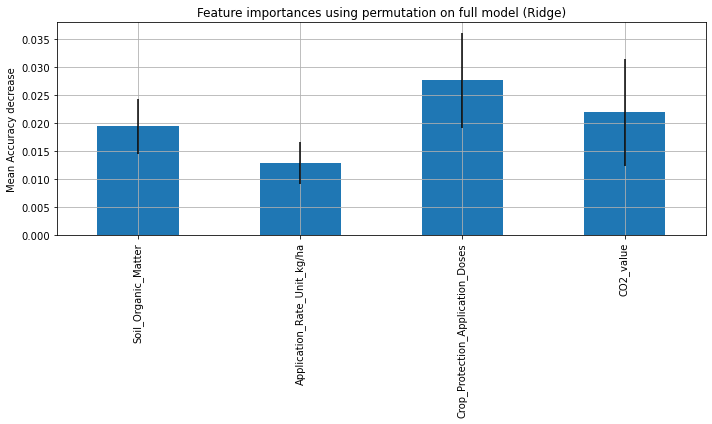

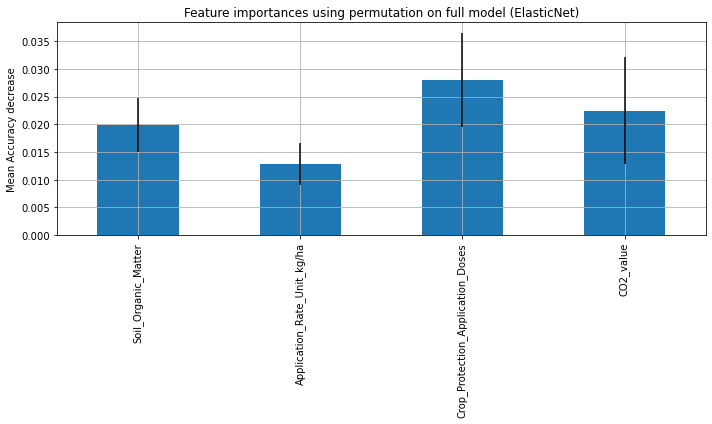

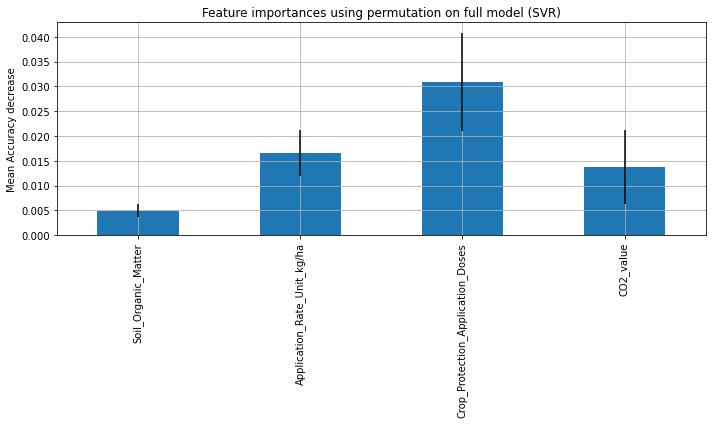

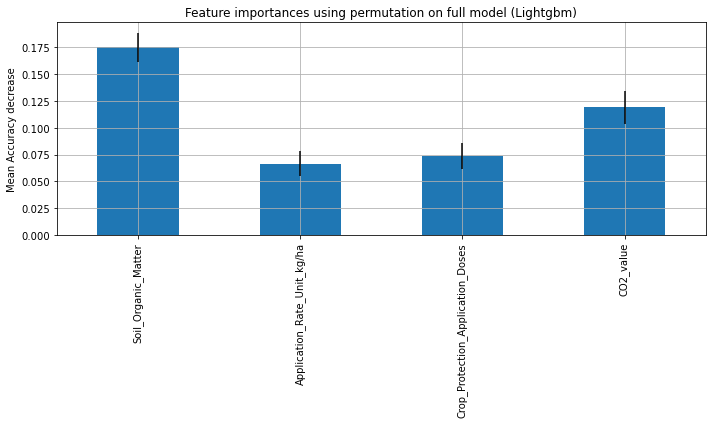

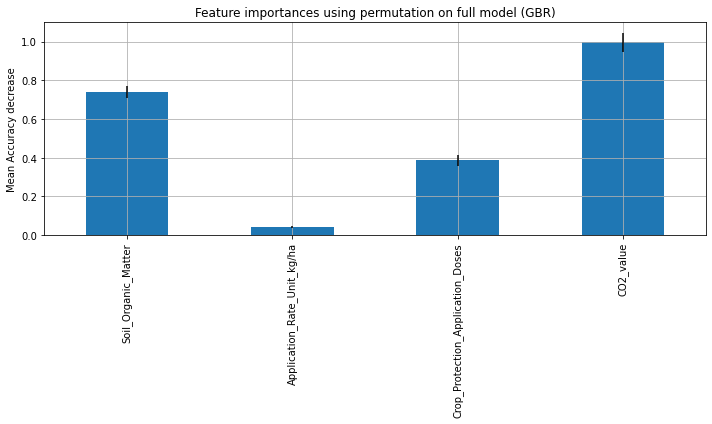

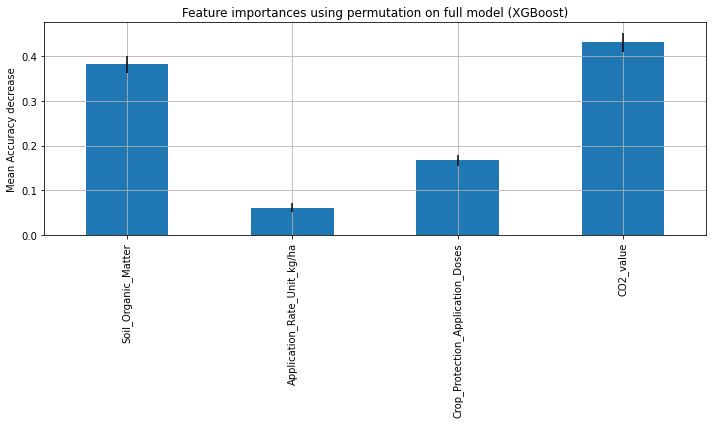

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names

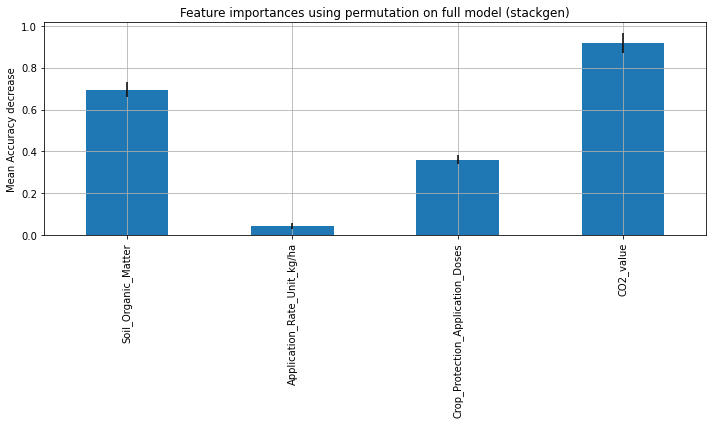

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names

In [130]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = X_train_yield_per_ha.columns

    result = permutation_importance(
        fitted_models[i], X_test_yield_per_ha, y_test_yield_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [155]:
CO2_min = df_subset_3_yield_per_area['CO2_value'].min()
CO2_max = df_subset_3_yield_per_area['CO2_value'].max()

# mean_Soil_pH = df_subset_3_yield_per_area['Soil_pH'].mean()

# mean_Total_Water_Applied_mm = df_subset_3_yield_per_area['Total_Water_Applied_mm'].mean()

mean_Application_Rate = df_subset_3_yield_per_area['Application_Rate_Unit_kg/ha'].median()

Crop_Protection_Application_Doses_min = df_subset_3_yield_per_area['Crop_Protection_Application_Doses'].quantile(.25)
mean_Crop_Protection_Application_Doses = df_subset_3_yield_per_area['Crop_Protection_Application_Doses'].median()
Crop_Protection_Application_Doses_max = df_subset_3_yield_per_area['Crop_Protection_Application_Doses'].quantile(.75)

Soil_Organic_Matter_min = df_subset_3_yield_per_area['Soil_Organic_Matter'].quantile(.25)
mean_Soil_Organic_Matter = df_subset_3_yield_per_area['Soil_Organic_Matter'].median()
Soil_Organic_Matter_max = df_subset_3_yield_per_area['Soil_Organic_Matter'].quantile(.75)
#.quantile(.75)

CO2_values = np.linspace(CO2_min, CO2_max, 300)

#no water, no pH
X_dataframe_1 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_min, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_min, \
                                          'Soil_Organic_Matter': Soil_Organic_Matter_min, \
                                    'CO2_value': CO2_values})

X_dataframe_2 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_min, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': mean_Crop_Protection_Application_Doses, \
                                    'CO2_value': CO2_values})

X_dataframe_3 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_min, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_max, \
                                    'CO2_value': CO2_values})

####mean soil organic matter
X_dataframe_4 = pd.DataFrame(data = {'Soil_Organic_Matter': mean_Soil_Organic_Matter, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_min, \
                                    'CO2_value': CO2_values})

X_dataframe_5 = pd.DataFrame(data = {'Soil_Organic_Matter': mean_Soil_Organic_Matter, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': mean_Crop_Protection_Application_Doses, \
                                    'CO2_value': CO2_values})


X_dataframe_6 = pd.DataFrame(data = {'Soil_Organic_Matter': mean_Soil_Organic_Matter, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_max, \
                                    'CO2_value': CO2_values})

####max soil organic matter
X_dataframe_7 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_max, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_min, \
                                    'CO2_value': CO2_values})

X_dataframe_8 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_max, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': mean_Crop_Protection_Application_Doses, \
                                    'CO2_value': CO2_values})

X_dataframe_9 = pd.DataFrame(data = {'Soil_Organic_Matter': Soil_Organic_Matter_max, \
                                          'Application_Rate_Unit_kg/ha': mean_Application_Rate, \
                                          'Crop_Protection_Application_Doses': Crop_Protection_Application_Doses_max, \
                                    'CO2_value': CO2_values})

dataframe_list = [X_dataframe_1, X_dataframe_2, X_dataframe_3, X_dataframe_4, X_dataframe_5, X_dataframe_6, X_dataframe_7, X_dataframe_8, X_dataframe_9]

print(display(X_dataframe_9))

,Soil_Organic_Matter,Application_Rate_Unit_kg/ha,Crop_Protection_Application_Doses,CO2_value
0,3.047963,200.0,21.0,-2246.650000
1,3.047963,200.0,21.0,-2226.269197
2,3.047963,200.0,21.0,-2205.888395
3,3.047963,200.0,21.0,-2185.507592
4,3.047963,200.0,21.0,-2165.126789
...,...,...,...,...
295,3.047963,200.0,21.0,3765.686789
296,3.047963,200.0,21.0,3786.067592
297,3.047963,200.0,21.0,3806.448395
298,3.047963,200.0,21.0,3826.829197


None


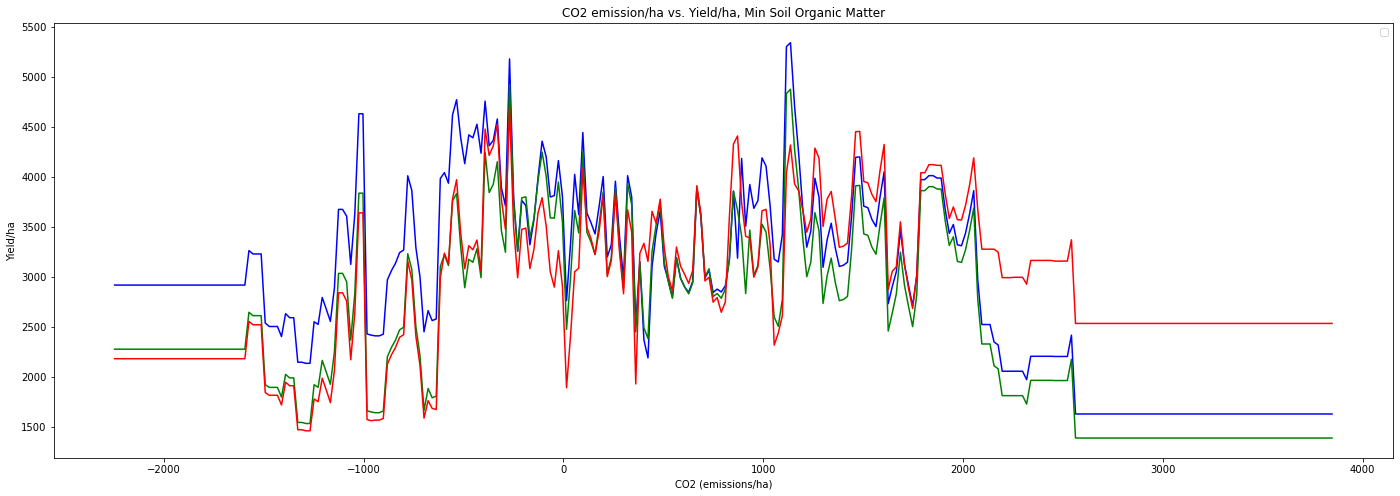

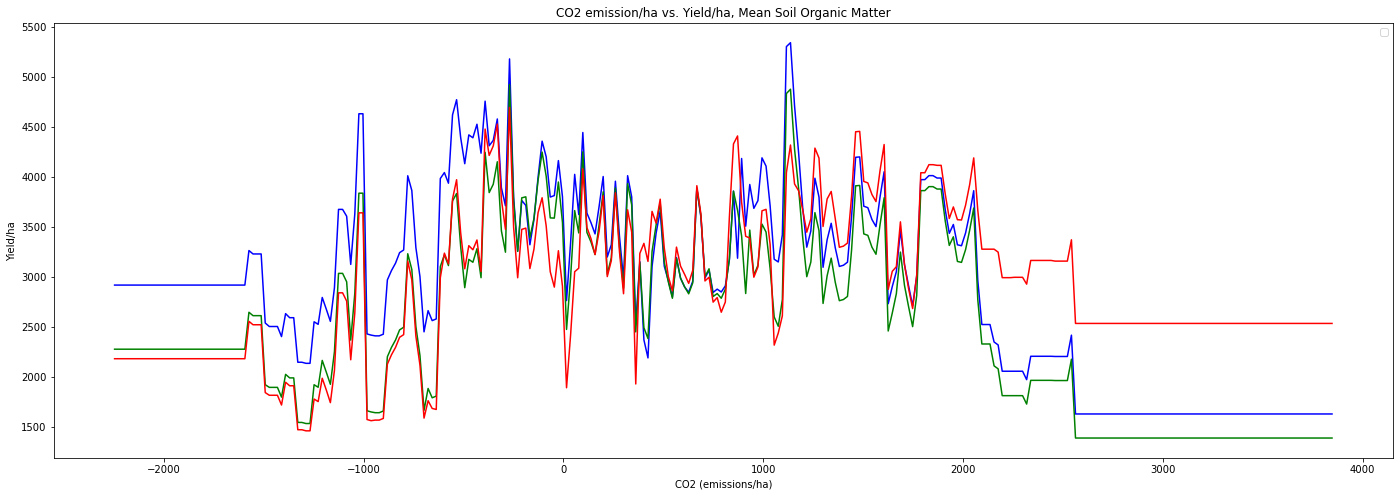

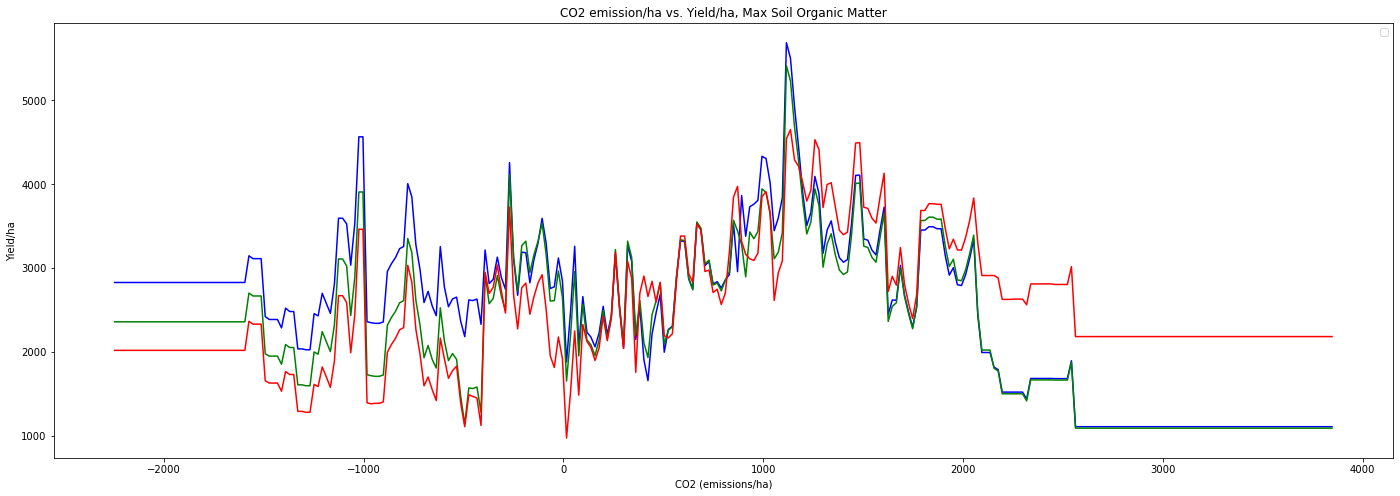

In [157]:
plot_name_list = ['Soil Organic Matter = (Minimum)', 'Soil Organic Matter = (Mean)', 'Soil Organic Matter = (Minimum)']

yield_pred_values_1 = fitted_models_3[5].predict(X_dataframe_1)
yield_pred_values_2 = fitted_models_3[5].predict(X_dataframe_2)
yield_pred_values_3 = fitted_models_3[5].predict(X_dataframe_3)

yield_pred_values_4 = fitted_models_3[5].predict(X_dataframe_4)
yield_pred_values_5 = fitted_models_3[5].predict(X_dataframe_5)
yield_pred_values_6 = fitted_models_3[5].predict(X_dataframe_6)

yield_pred_values_7 = fitted_models_3[5].predict(X_dataframe_7)
yield_pred_values_8 = fitted_models_3[5].predict(X_dataframe_8)
yield_pred_values_9 = fitted_models_3[5].predict(X_dataframe_9)

plt.figure(figsize = (24,8))
plt.title('CO2 emission/ha vs. Yield/ha, Min Soil Organic Matter')
plt.xlabel('CO2 (emissions/ha)')
plt.ylabel('Yield/ha')
min_value = plt.plot(X_dataframe_1['CO2_value'], yield_pred_values_1, color = 'blue')
mean_value = plt.plot(X_dataframe_2['CO2_value'], yield_pred_values_2, color = 'green')
max_value = plt.plot(X_dataframe_3['CO2_value'], yield_pred_values_3, color = 'red')
plt.legend((min_value, mean_value, max_value), ('Min Application Rate', 'Mean_Application Rate', 'Max_Application Rate'))
plt.show()

plt.figure(figsize = (24,8))
plt.title('CO2 emission/ha vs. Yield/ha, Mean Soil Organic Matter')
plt.xlabel('CO2 (emissions/ha)')
plt.ylabel('Yield/ha')
min_value = plt.plot(X_dataframe_4['CO2_value'], yield_pred_values_4, color = 'blue')
mean_value = plt.plot(X_dataframe_5['CO2_value'], yield_pred_values_5, color = 'green')
max_value = plt.plot(X_dataframe_6['CO2_value'], yield_pred_values_6, color = 'red')
plt.legend((min_value, mean_value, max_value), ('Min Application Rate', 'Mean_Application Rate', 'Max_Application Rate'))
plt.show()           

plt.figure(figsize = (24,8))
plt.title('CO2 emission/ha vs. Yield/ha, Max Soil Organic Matter')
plt.xlabel('CO2 (emissions/ha)')
plt.ylabel('Yield/ha')
min_value = plt.plot(X_dataframe_4['CO2_value'], yield_pred_values_7, color = 'blue')
mean_value = plt.plot(X_dataframe_5['CO2_value'], yield_pred_values_8, color = 'green')
max_value = plt.plot(X_dataframe_6['CO2_value'], yield_pred_values_9, color = 'red')
plt.legend((min_value, mean_value, max_value), ('Min Application Rate', 'Mean_Application Rate', 'Max_Application Rate'))
plt.show()

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.coef_

In [ ]:
# Load modules and data
import os
import pandas as pd
import scipy as sp
import numpy as np
import math
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from scipy import stats




import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import statsmodels.formula.api as smf # If formulas are to be used




#header=Crop_Area_ha    Dry_Finished_Yield_Mass_kg    Soil_Organic_Matter    Soil_Drainage    
#Soil_pH    Fertilizer_Type    Application_Rate_Unit_kg/ha    Application_Method    N_as_Urea_%    
#N_as_Nitrate_%    N_as_Ammonium_%    P_as_Phosphorus_%    P_as_P2O5_%    K_as_Potassium_%    
#K_as_K2O_%    Crop_Protection_Application_Doses    Machine    Num_Passes    
#Total_Water_Applied_mm       result    value      unit                        




###################################################################################
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 1000)
# df.head(200) shows 200 rows



cwd=os.path.abspath('')
#C:\Users\ELRDH\OneDrive - Bayer\Personal Data\CO2
os.chdir('C:\\Users\\ELRDH\\OneDrive - Bayer\\Personal Data\\CO2\\REGRESSION')
files=os.listdir(cwd)



##################################################################################################################
df=pd.read_csv('Brazil_CO2_df.csv')
df1= df.loc[df['result']=='emissions_per_area']  # Subsetting
df1=df1.loc[df1['Machine']=='herbicide spraying']
df1=df1.loc[df1['Soil_Drainage']=='good']
df1=df1.loc[df1['Fertilizer_Type']=='Compose your own NPK']
df1=df1.loc[df1['Application_Method']=='Incorporate']
df1=df1.loc[df1['Machine']=='herbicide spraying']
df1=df1.loc[df1['result']=='emissions_per_area']




yha=df1['Dry_Finished_Yield_Mass_kg']/df1['Crop_Area_ha']



yha=pd.DataFrame(yha)
pd.concat([yha, yha], axis=1)
dfs=pd.concat([df1['Soil_Organic_Matter'],df1['Application_Rate_Unit_kg/ha'],df1['Crop_Protection_Application_Doses'],df1['value'],yha],axis=1)
dfs=dfs.dropna()




header=list(dfs.columns)




# Soil_pH and Total_Water_Applied are removed
dfs=pd.concat([dfs['value'],dfs['Soil_Organic_Matter'],dfs['Application_Rate_Unit_kg/ha'],dfs['Crop_Protection_Application_Doses'],yha],axis=1)
dfs.rename(columns = {0:'Yield_per_ha'}, inplace = True)
dfs.rename(columns = {'Application_Rate_Unit_kg/ha':'Application_Rate_Unit_kg_per_ha'}, inplace = True)
header=list(dfs.columns)



mod2=smf.ols(formula=' Yield_per_ha ~ Application_Rate_Unit_kg_per_ha + Soil_Organic_Matter + Crop_Protection_Application_Doses + value', data=dfs)
res2 = mod2.fit()
print(res2.summary())






def histy(i):
    x=dfs[header[i]]
    y=(x-x.mean())/x.std()
    z,lam = stats.yeojohnson(y)
    histx=pd.DataFrame(x).hist()
    histy=pd.DataFrame(y).hist()
    histz=pd.DataFrame(z).hist()
    qqy = sm.qqplot(y, line='45')
    qqz = sm.qqplot(z, line='45')
    plt.show()
    return lam,histx,histy,histz

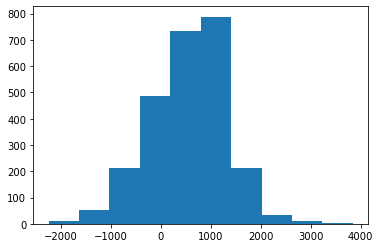

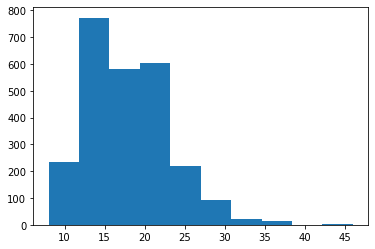

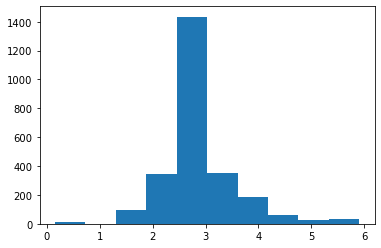

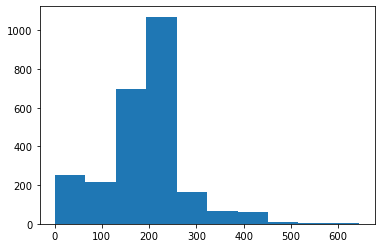

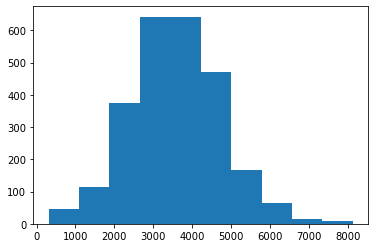

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted withou

In [158]:
plt.figure()
plt.hist(X_3_train_yield_per_ha['CO2_value'])
plt.show()

# plt.figure()
# plt.hist(X_3_train_yield_per_ha['Soil_pH'])
# plt.show()

# plt.figure()
# plt.hist(X_3_train_yield_per_ha['Total_Water_Applied_mm'])
# plt.show()

plt.figure()
plt.hist(X_3_train_yield_per_ha['Crop_Protection_Application_Doses'])
plt.show()

plt.figure()
plt.hist(X_3_train_yield_per_ha['Soil_Organic_Matter'])
plt.show()

plt.figure()
plt.hist(X_3_train_yield_per_ha['Application_Rate_Unit_kg/ha'])
plt.show()

plt.figure()
plt.hist(y_3_train_yield_per_ha)
plt.show()

# plt.figure()
# plt.hist(X_3_train_yield_per_ha['yield_per_ha'])
# plt.show()

In [52]:
print(yield_pred_values_1)
print(yield_pred_values_2)
print(yield_pred_values_3)
print(yield_pred_values_4)
print(yield_pred_values_5)
print(yield_pred_values_6)
print(yield_pred_values_7)
print(yield_pred_values_8)
print(yield_pred_values_9)

[3957.96035142 3957.96035142 3957.96035142 3957.96035142 3957.96035142
 3957.96035142 3957.96035142 3957.96035142 3957.96035142 3957.96035142
 3957.96035142 3957.96035142 3957.96035142 3957.96035142 3957.96035142
 3957.96035142 3957.96035142 3957.96035142 3957.96035142 3957.96035142
 3957.96035142 3957.96035142 3957.96035142 3957.96035142 3957.96035142
 3957.96035142 3957.96035142 3957.96035142 3957.96035142 3957.96035142
 3957.96035142 3957.96035142 3957.96035142 3957.96035142 3957.96035142
 3957.96035142 3957.96035142 4475.54021979 4475.54021979 4475.54021979
 4475.54021979 4475.54021979 4475.54021979 4475.54021979 4475.54021979
 4475.54021979 4475.54021979 4475.54021979 4475.54021979 4475.54021979
 4475.54021979 4475.54021979 4475.54021979 4475.54021979 4475.54021979
 4475.54021979 4475.54021979 4475.54021979 4475.54021979 4475.54021979
 4475.54021979 4475.54021979 4475.54021979 4475.54021979 4475.54021979
 4475.54021979 4475.54021979 4475.54021979 4475.54021979 4475.54021979
 4475.